# **MAREPIU - AN ANALYSIS OF B2C MARKET OPPORTUNITIES**

Marepiù is a well-established company in the seafood industry, primarily operating in the B2B (wholesale) market. This study was conducted to analyze the market and evaluate the feasibility of entering the B2C sector, with the aim of understanding consumer preferences and needs. To achieve this, a consumer survey was conducted to gather data on seafood consumption patterns, shopping habits, and demographic characteristics. The collected data was analyzed using statistical models to identify key market trends and consumer expectations. The findings of this analysis will provide crucial support for the company’s strategic decisions, helping to determine whether—and how—Marepiù’s seafood products can be successfully introduced to the retail sector.

---
## Table of Contents

### 1. Data Loading and Description

### 2. Segmentation
- 2.1. Data
- 2.2. Clustering
  - 2.2.1. Optimal Number of Clusters
  - 2.2.2. K-Means (k=2)
  - 2.2.3. K-Means (k=4)
  - 2.2.4. Hierarchical Clustering
- 2.3. PCA
  - 2.3.1. Principal Components
  - 2.3.2. Optimal Number of Clusters
  - 2.3.3. K-Means (k=4)
  - 2.3.4. Clusters Analysis (k=2)
- 2.4. Variable Selection
  - 2.4.1. Optimal Number of Clusters
  - 2.4.2. K-Means (k=2)
  - 2.4.3. K-Means (k=4)
- 2.5. Clusters Analysis
  - 2.5.1. Analysis of Sample
  - 2.5.2. Analysis of Clusters

### 3. Classification
- 3.1. Multinomial Logit Model
- 3.2. Random Forest

### 4. Conclusions and Limitations
---


# **SEGMENTATION**
A first general questionnaire was conducted to analyze the overall consumer market and identify potential target segments for the company’s entry into the B2C market. 
The survey aimed to gather insights into consumer habits, behaviors, and needs within the seafood category, serving as a preliminary step before narrowing the focus on specific products or attributes.
To ensure comprehensive data collection, the survey was structured with no optional questions, avoiding any missing values. Additionally, an “Other: …” answer was included in every multiple-choice question to allow respondents to express ideas not covered by the predefined options.
The questionnaire was structured as follows: 

**1. Demographic Data**: general questions about demographic characteristics (e.g., age, gender, geographical location) were included to profile consumers.

**2. Consumption Habits**: this section explored frequency of seafood consumption, types of seafood most frequently consumed (e.g., fresh, frozen, or processed), average time spent on meal preparation during the day.
From these responses, potential interest in frozen seafood products can be hypothesized. For instance:

-	Consumers who spend significant time preparing meals might not feel the need for ready-to-cook frozen alternatives.

-	On the other hand, consumers with less time for meal preparation might represent a more receptive audience for frozen seafood products.

**3. Purchasing Behavior**: this section explored shopping preferences and habits (e.g., purchasing channels, price consumers are willing to spend).
These questions aimed to uncover actionable information about the most appropriate distribution strategies for frozen seafood products.

**4. Product Preferences**: questions about key product attributes such as freshness, nutritional balance, price, speed and simplicity of preparation, were designed to assess the attractiveness of the company’s potential offerings in the consumer market and identify which product features resonate most with the target audience. 

Analyzing the responses provides valuable insights into the seafood market, enabling the identification of key trends and effective audience segmentation. This first general survey sets the stage for more focused studies (e.g., conjoint analysis) by highlighting critical factors like the importance of convenience or the role of speed and simplicity of cooking in consumer decisions.

The survey was distributed through Google Forms and shared via WhatsApp, Facebook groups, university groups, and Instagram, reaching family, friends, acquaintances, and colleagues. We concluded with a total of **347 respondents** and **28 questions**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats
from statsmodels.stats import weightstats as st
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from factor_analyzer.factor_analyzer import calculate_kmo
import re
import statsmodels.formula.api as smf
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

---


## **1. Data loading and description**
The dataset consists of 347 rows and 28 columns, each representing a specific question from the survey.

In [2]:
raw_data = pd.read_csv("data/segmentation_data.csv")
raw_data.head()

Informazioni cronologiche Qual è la tua età? In che regione vivi?  \
0  2024/11/24 11:38:10 AM CET         18-25 anni            Lombardia   
1  2024/11/24 11:39:37 AM CET         18-25 anni            Lombardia   
2  2024/11/24 11:39:51 AM CET         18-25 anni               Veneto   
3  2024/11/24 11:48:20 AM CET         26-35 anni            Lombardia   
4  2024/11/24 11:49:38 AM CET         60-70 anni            Lombardia   

                            In che zona abiti?  \
0                                 Centro città   
1                                 Centro città   
2                                 Centro città   
3                              Periferia città   
4  Esterno (es. campagna/costiera/montagna...)   

  Con quale genere ti identifichi?  \
0                             Uomo   
1                             Uomo   
2                            Donna   
3                            Donna   
4                            Donna   

  Da quanti componenti è formato il tuo nucleo familiare?  \
0                                                 4+        
1                                                2-3        
2                                                  1        
3                                                2-3        
4                                                  1        

  Qual è la tua professione? Consumi prodotti ittici?  \
0                   Studente                       Si   
1                 Lavoratore                       Si   
2                   Studente                       Si   
3                 Lavoratore                       Si   
4                 Lavoratore                       Si   

  Per quale motivo non consumi prodotti ittici?  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  Quanto spesso consumi prodotti ittici?  ...  \
0                  Una volta a settimana  ...   
1                  Una volta a settimana  ...   
2                  Una volta a settimana  ...   
3                Una o due volte al mese  ...   
4                Una o due volte al mese  ...   

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]  \
0                          3 - Mediamente importante                                                   
1                          4 - Abbastanza importante                                                   
2                          3 - Mediamente importante                                                   
3                                2 - Poco importante                                                   
4                               5 - Molto importante                                                   

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]  \
0                                2 - Poco importante                                                     
1                          4 - Abbastanza importante                                                     
2                                2 - Poco importante                                                     
3                          3 - Mediamente importante                                                     
4                               5 - Molto importante                                                     

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]  \
0                          4 - Abbastanza importante                                                             
1                          3 - Mediamente importante                                                             
2                               5 - Molto importante                                                             
3    

After collecting general demographic information, such as age range or region of residence, the survey included an initial question: "*Do you consume fish products*?". Respondents who selected "*NO*" were redirected to the final section of the survey, in which they were asked for motivations.

In [3]:
data_no = raw_data[raw_data['Consumi prodotti ittici?']=='No']
len(data_no)

39

In [4]:
no_fish = len(data_no)/len(raw_data)*100
print(f"Percentage of people who don't eat fish (according to our data) is {no_fish:.2f}%")

Percentage of people who don't eat fish (according to our data) is 11.24%


While we acknowledge that our sample is not perfectly representative of the general population, we can infer, based on the collected data, that approximately **one-tenth of the population could be excluded a priori** as potential customers. This is due to their complete abstention from consuming fish products, regardless of influencing factors such as price, freshness, or availability. This insight is valuable for refining target market strategies and focusing resources on segments with higher potential.

To strengthen this analysis and validate the assumption, we investigated the specific reasons behind this group’s decision to avoid fish products. Understanding these motivations provides a more comprehensive picture of the consumer landscape and offers indirect insights into potential barriers or opportunities for expanding market reach. By analyzing these responses, we aim to identify whether their abstention is driven by personal preferences, dietary restrictions, ethical considerations, or other factors, thus enriching the overall interpretation of the sample under study.

In [5]:
response_distribution = raw_data['Per quale motivo non consumi prodotti ittici?'].value_counts()
response_distribution

Per quale motivo non consumi prodotti ittici?
Questione di gusti                                20
Sono vegetariano/vegano                            7
Hanno un prezzo troppo alto                        3
Questione di gusti;Hanno un prezzo troppo alto     2
Abitudine                                          1
Non so cosa sono i prodotti ittici                 1
Non ci penso non ci faccio caso                    1
Sono vegetariano/vegano;Questione di gusti         1
Sono allergica                                     1
Questione di gusti;                                1
Non mi piacciono                                   1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------------

After this brief preliminary analysis, we filtered the data to include only respondents who consume seafood products.

In [6]:
data = raw_data[raw_data['Consumi prodotti ittici?']=='Si']
data.head()

Informazioni cronologiche Qual è la tua età? In che regione vivi?  \
0  2024/11/24 11:38:10 AM CET         18-25 anni            Lombardia   
1  2024/11/24 11:39:37 AM CET         18-25 anni            Lombardia   
2  2024/11/24 11:39:51 AM CET         18-25 anni               Veneto   
3  2024/11/24 11:48:20 AM CET         26-35 anni            Lombardia   
4  2024/11/24 11:49:38 AM CET         60-70 anni            Lombardia   

                            In che zona abiti?  \
0                                 Centro città   
1                                 Centro città   
2                                 Centro città   
3                              Periferia città   
4  Esterno (es. campagna/costiera/montagna...)   

  Con quale genere ti identifichi?  \
0                             Uomo   
1                             Uomo   
2                            Donna   
3                            Donna   
4                            Donna   

  Da quanti componenti è formato il tuo nucleo familiare?  \
0                                                 4+        
1                                                2-3        
2                                                  1        
3                                                2-3        
4                                                  1        

  Qual è la tua professione? Consumi prodotti ittici?  \
0                   Studente                       Si   
1                 Lavoratore                       Si   
2                   Studente                       Si   
3                 Lavoratore                       Si   
4                 Lavoratore                       Si   

  Per quale motivo non consumi prodotti ittici?  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  Quanto spesso consumi prodotti ittici?  ...  \
0                  Una volta a settimana  ...   
1                  Una volta a settimana  ...   
2                  Una volta a settimana  ...   
3                Una o due volte al mese  ...   
4                Una o due volte al mese  ...   

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]  \
0                          3 - Mediamente importante                                                   
1                          4 - Abbastanza importante                                                   
2                          3 - Mediamente importante                                                   
3                                2 - Poco importante                                                   
4                               5 - Molto importante                                                   

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]  \
0                                2 - Poco importante                                                     
1                          4 - Abbastanza importante                                                     
2                                2 - Poco importante                                                     
3                          3 - Mediamente importante                                                     
4                               5 - Molto importante                                                     

  Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]  \
0                          4 - Abbastanza importante                                                             
1                          3 - Mediamente importante                                                             
2                               5 - Molto importante                                                             
3    

In [7]:
print(f"Number of people who eat fish products: {len(data)}")
print(f"Percentage: {len(data)/len(raw_data)*100:.2f}%")

Number of people who eat fish products: 308
Percentage: 88.76%


**308 people eat fish**, which is almost 90% of our sample. Of these, we want to understand their needs and habits in order to identify similar behaviors within groups of the population.

To conclude data pre-processing, we set an index column corresponding to **respondent ID**.

In [8]:
data = data.copy()
data.loc[:, 'respondent_id'] = data.index
data = data.set_index('respondent_id')

---


## **2. Segmentation**

### **2.1. Data**
The dataframe "_segmentation_data_" consists of a selection of columns (17 to 28) from the original dataset. They contain the importance ratings assigned from each respondent to various product characteristics. The attributes we decided to take into account are the following:
- **freshness**: importance of the freshness of the purchased product.
- **origin**: importance of the origin of the raw materials.
- **cooking_speed**: importance of the speed of preparation.
- **cooking_simplicity**: importance of the simplicity of preparation.
- **nutritional_balance**: importance of the nutritional balance of the product.
- **innovative_products**: importance of the presence of new/innovative products.
- **unprocessed**: importance of the product being natural/minimally processed.
- **price**: importance of the price.
- **single_portion**: importance of the availability of single-portion products.
- **sustainable_sources**: importance of the ingredients coming from sustainable sources (e.g., certified fishing).
- **low_impact_environment**: importance of low environmental impact in production.
- **sustainable_packaging**: importance of eco-friendly packaging.

The responses range from 1 to 5, where 1 represents "Not interested" and 5 represents "Very important".

In [9]:
segmentation_data = data.iloc[:, 16:28]
segmentation_data

Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]  \
respondent_id                                                                                                                
0                                      4 - Abbastanza importante                                                             
1                                           5 - Molto importante                                                             
2                                           5 - Molto importante                                                             
3                                           5 - Molto importante                                                             
4                                           5 - Molto importante                                                             
...                                                          ...                                                             
341                                         5 - Molto importante                                                             
342                                    4 - Abbastanza importante                                                             
343                                         1 - Non mi interessa                                                             
344                                    4 - Abbastanza importante                                                             
345                                         5 - Molto importante                                                             

              Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]  \
respondent_id                                                                                                             
0                                      3 - Mediamente importante                                                          
1                                      3 - Mediamente importante                                                          
2                                      4 - Abbastanza importante                                                          
3                                      3 - Mediamente importante                                                          
4                                           5 - Molto importante                                                          
...                                                          ...                                                          
341                                         5 - Molto importante                                                          
342                                    3 - Mediamente importante                                                          
343                                         1 - Non mi interessa                                                          
344                                    4 - Abbastanza importante                                                          
345                                    4 - Abbastanza importante                                                          

              Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]  \
respondent_id                                                                                                      
0                                      3 - Mediamente importante                                                   
1                                      4 - Abbastanza importante                                                   
2                                      3 - Mediamente importante                                                   
3                                            2 - Poco importante                                                   
4                                           5 - Molto importante               

We renamed columns with pre-specified and easier **column names** and mapped cell values to integers.

In [10]:
# rename columns
new_names = { 'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]' : 'freshness',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]': 'origin',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]' : 'cooking_speed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]' : 'cooking_simplicity',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]' : 'nutritional_balance',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]': 'innovative_products',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]' : 'unprocessed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]' : 'price',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]' : 'single_portion',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]' : 'sustainable_sources',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]' : 'low_impact_environment',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]' : 'sustainable_packaging'}

segmentation_data = segmentation_data.rename(columns=new_names)

# map textual responses to numerical values
response_mapping = {
    '1 - Non mi interessa': 1,
    '2 - Poco importante': 2,
    '3 - Mediamente importante': 3,
    '4 - Abbastanza importante': 4,
    '5 - Molto importante': 5
}

for column in segmentation_data.columns:
    segmentation_data[column] = segmentation_data[column].map(response_mapping)

segmentation_data.head()

freshness  origin  cooking_speed  cooking_simplicity  \
respondent_id                                                         
0                      4       3              3                   2   
1                      5       3              4                   4   
2                      5       4              3                   2   
3                      5       3              2                   3   
4                      5       5              5                   5   

               nutritional_balance  innovative_products  unprocessed  price  \
respondent_id                                                                 
0                                4                    1            2      5   
1                                3                    2            4      4   
2                                5                    2            3      4   
3                                4                    1            5      4   
4                                4                    2            5      5   

               single_portion  sustainable_sources  low_impact_environment  \
respondent_id                                                                
0                           2                    5                       4   
1                           4                    5                       5   
2                           4                    3                       3   
3                           1                    3                       3   
4                           5                    5                       5   

               sustainable_packaging  
respondent_id                         
0                                  4  
1                                  5  
2                                  3  
3                                  3  
4                                  5

Check **null values**:

In [11]:
segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   freshness               308 non-null    int64
 1   origin                  308 non-null    int64
 2   cooking_speed           308 non-null    int64
 3   cooking_simplicity      308 non-null    int64
 4   nutritional_balance     308 non-null    int64
 5   innovative_products     308 non-null    int64
 6   unprocessed             308 non-null    int64
 7   price                   308 non-null    int64
 8   single_portion          308 non-null    int64
 9   sustainable_sources     308 non-null    int64
 10  low_impact_environment  308 non-null    int64
 11  sustainable_packaging   308 non-null    int64
dtypes: int64(12)
memory usage: 31.3 KB


We computed some **metrics** of each attribute ...

In [12]:
segmentation_data.describe().style.format("{:.1f}")

... and **plotted** distribution to understand.

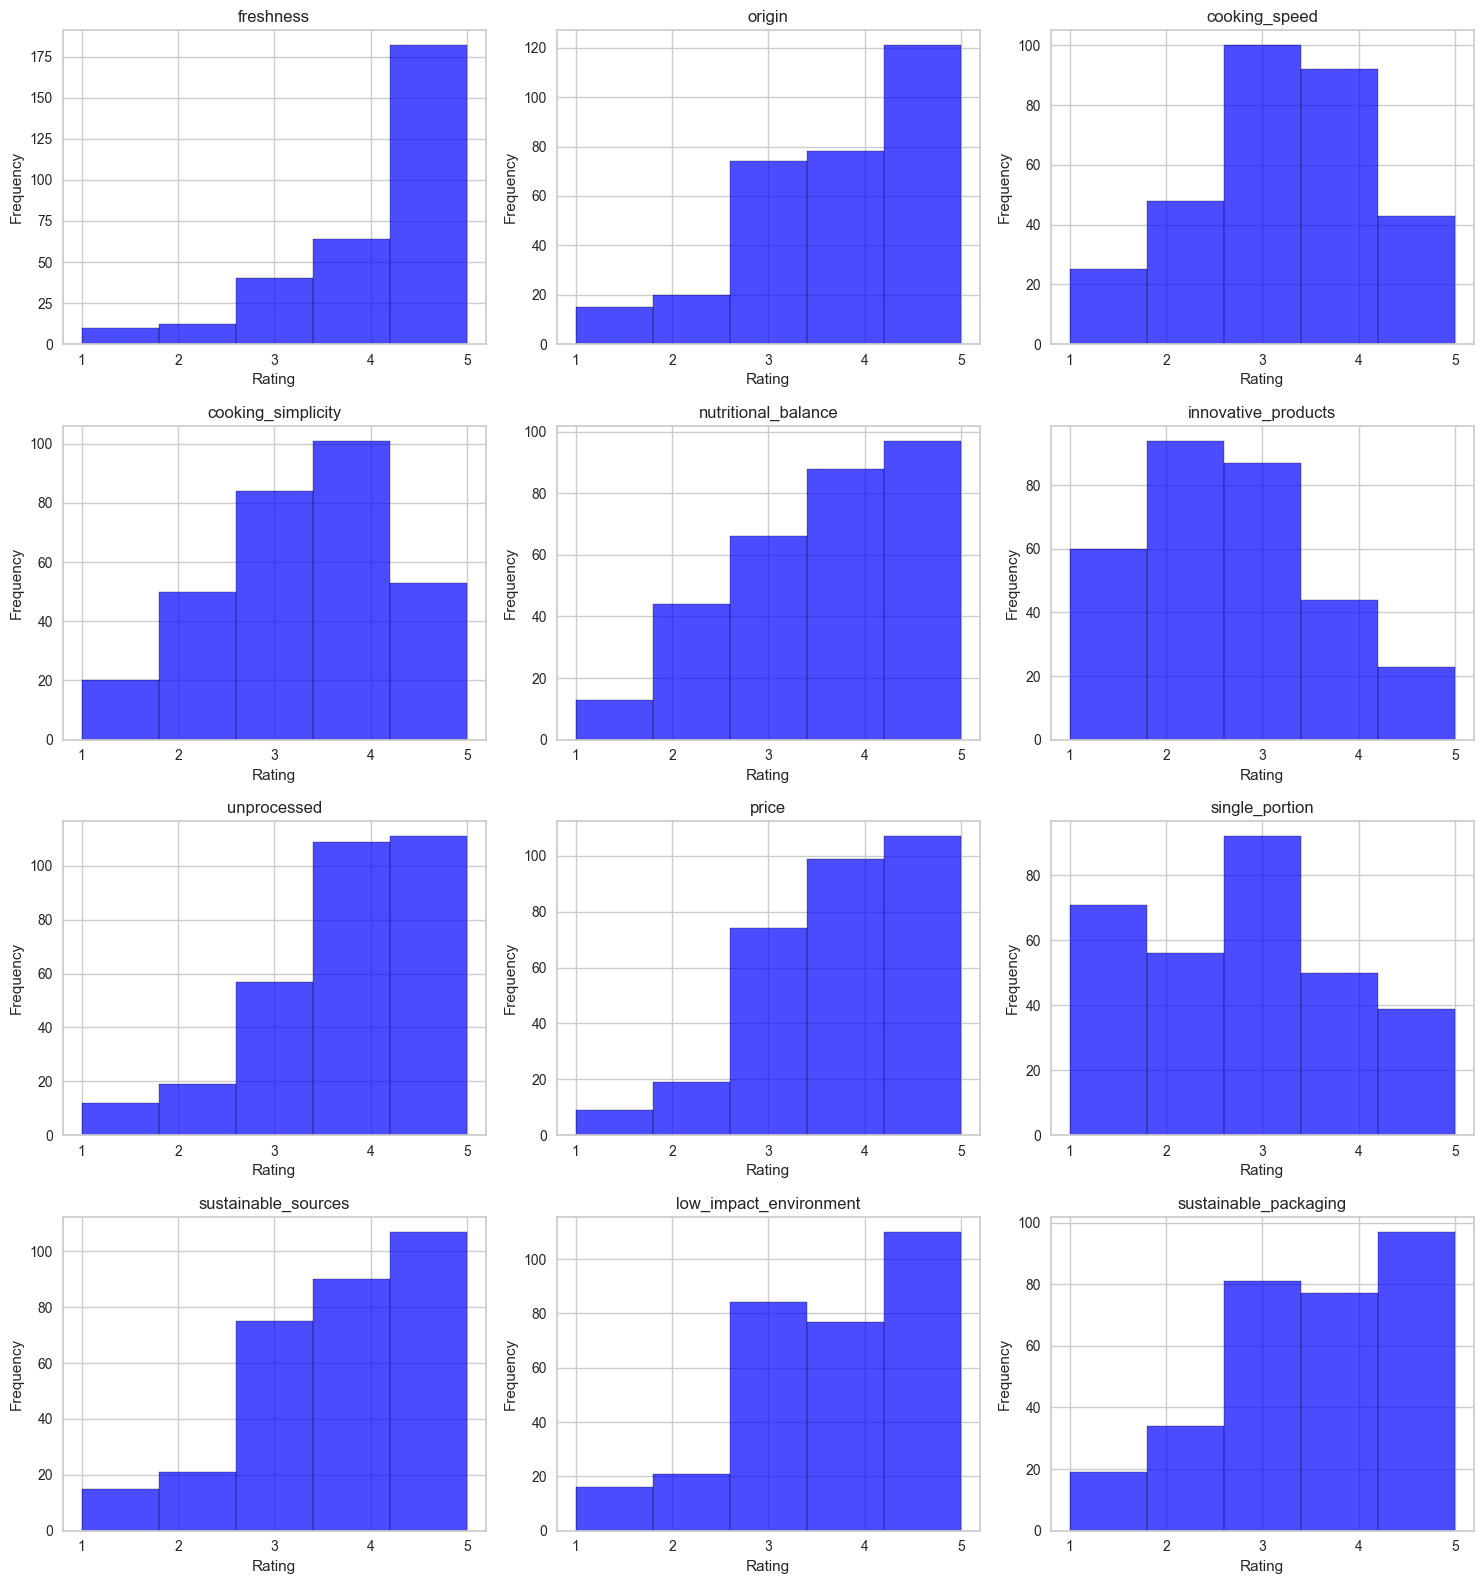

In [13]:
num_variables = len(segmentation_data.columns) 
num_rows = num_variables // 3 + (num_variables % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4), tight_layout=True)
axes = axes.flatten()

for index, column in enumerate(segmentation_data.columns):
    axes[index].hist(segmentation_data[column], bins=5, range=(1, 5), alpha=0.7, color='blue', edgecolor='black')
    axes[index].set_title(column)
    axes[index].set_xlabel('Rating')
    axes[index].set_ylabel('Frequency')
    axes[index].set_xticks(range(1, 6))

for i in range(index + 1, len(axes)):
    axes[i].axis('off')

plt.show()

The distributions reveal insights into the **respondents' perceptions and preferences** across different attributes. Overall, many attributes are skewed towards higher ratings (4 and 5), indicating that most respondents seem to have positive views on the various characteristics. However, there are some notable exceptions where responses are more balanced or spread across lower ratings, reflecting some areas where satisfaction may vary more.

A brief analysis of each attribute was conducted:
- **Freshness:** strong preference for high freshness, with the majority of respondents rating it 4 or 5, suggesting that freshness is a crucial factor for seafood consumers.
- **Origin:** similar to freshness, a significant portion of the respondents rated the origin of seafood positively (4 and 5), but there are more people rating it lower (1 and 2).
- **Cooking Speed:** responses are more spread across the rating scale, with the highest concentration in the mid-range.
- **Cooking Simplicity:** the distribution is more positively skewed with a high number of respondents rating simplicity at 4.
- **Nutritional Balance:** many respondents rating it 4 or 5.
- **Innovative Products:** the distribution is more balanced, with the highest frequencies at 2 and 3, indicating a moderate interest in innovative products. This may indicate that while innovation in seafood products is appreciated, it might not be a top priority for most respondents.
- **Unprocessed:** there is a strong preference for unprocessed seafood, with a high concentration of ratings at 4 and 5.
- **Price:** the distribution is right-skewed, with the majority of respondents rating it 4 or 5, suggesting that affordability is a key concern in their purchasing decisions.
- **Single Portion:** the distribution is skewed towards 1 and 3. The demand for single-portion seafood products seems to vary, with some respondents being indifferent.
- **Sustainable Sources:** many respondents rate sustainable sourcing highly (4 and 5), with the majority seeming to prioritize sustainability.
- **Low Impact Environment:** similar to sustainable sourcing, most respondents rated low environmental impact positively (4 and 5), reflecting strong concern for environmental factors.
- **Sustainable Packaging:** the majority of responses are positive, with most ratings clustered around 3 to 5, showing concern for sustainability in packaging.

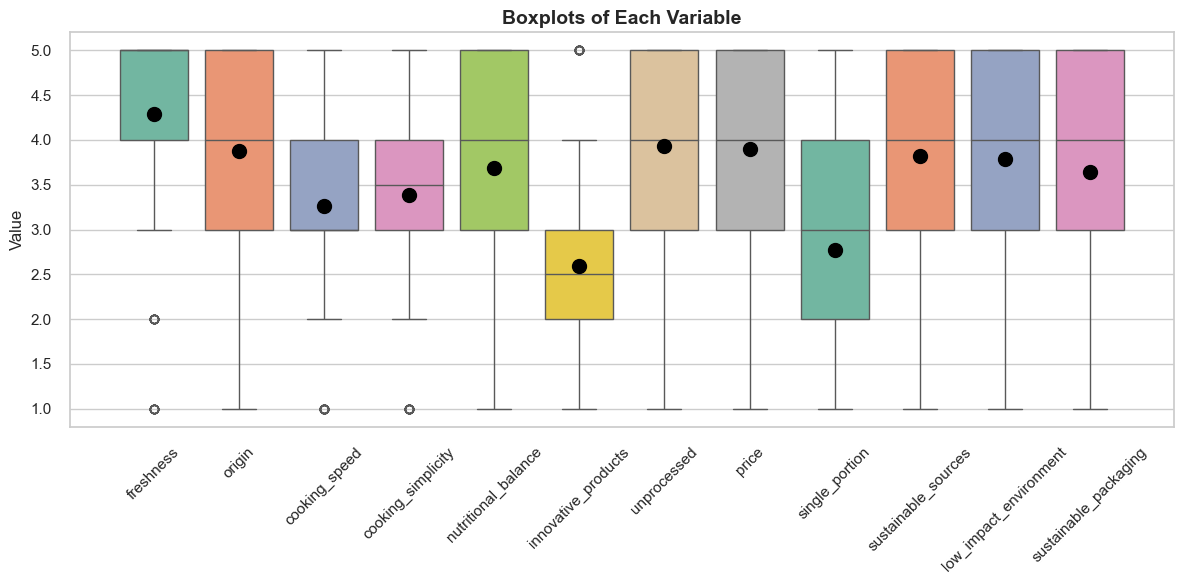

In [14]:
sns.set(style="whitegrid")
df_melted = segmentation_data.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted, hue='Variable', palette='Set2', legend=False)
means = segmentation_data.mean()

for i, mean in enumerate(means):
    plt.scatter(i, mean, color='black', label='Mean' if i == 0 else "", s=100, zorder=10)
    
plt.title('Boxplots of Each Variable', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplots provide a clear picture of how respondents perceive different attributes related to seafood products. 

Attributes like '*freshness*' and '*origin*' stand out with consistently high ratings, indicating they are **critical factors** for most consumers, as reflected by their tight distributions around 4 and 5. 

'*Sustainability*'-related aspects also show strong preferences, highlighting the importance of **environmental consciousness**. 

On the other hand, attributes such as '*cooking speed and simplicity*' exhibit wider variability, suggesting more diverse views on their significance.

Notably, '*innovative products*' receive the lowest overall ratings, indicating **limited enthusiasm** for innovation in seafood. 

Overall, the data suggest a strong focus on traditional and sustainable qualities, with less emphasis on innovation or convenience.

Last, we checked for **correlation** between attributes:

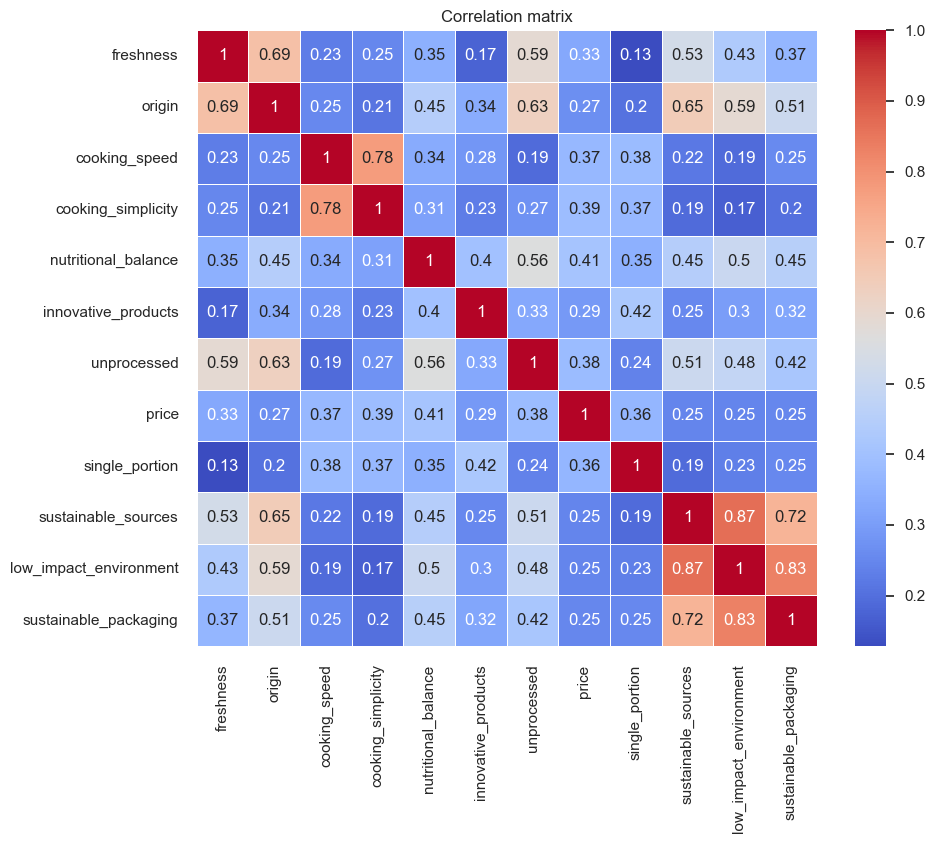

In [15]:
corr_matrix = segmentation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

-  Even though '*freshness*' and '*origin*' appear to be correlated (**0.69**), we decided to keep them both because they have significantly different implications in our decision and labour process.
- '*Cooking_speed*' and '*cooking_simplicity*' have a high correlation (**0.78**). Our respondents may have perceived them as having the same meaning; therefore, we computed their mean and created a new variable named '*speed_n_simplicity*'.
- In the correlation matrix, the last three variables related to sustainability are highly correlated. We first dropped '*low_impact_environment*' and retained '*sustainable_sources*' because of their similar implications. '*sustainable_packaging*' is also correlated with both, but we decided to keep it due to the increasing relevance given nowadays to this factor.

In [16]:
segmentation_data['speed_n_simplicity'] = segmentation_data[['cooking_speed', 'cooking_simplicity']].mean(axis=1)
final_segmentation_data = segmentation_data.drop(['cooking_speed', 'cooking_simplicity', 'low_impact_environment'], axis=1)
final_segmentation_data.head()

freshness  origin  nutritional_balance  innovative_products  \
respondent_id                                                                
0                      4       3                    4                    1   
1                      5       3                    3                    2   
2                      5       4                    5                    2   
3                      5       3                    4                    1   
4                      5       5                    4                    2   

               unprocessed  price  single_portion  sustainable_sources  \
respondent_id                                                            
0                        2      5               2                    5   
1                        4      4               4                    5   
2                        3      4               4                    3   
3                        5      4               1                    3   
4                        5      5               5                    5   

               sustainable_packaging  speed_n_simplicity  
respondent_id                                             
0                                  4                 2.5  
1                                  5                 4.0  
2                                  3                 2.5  
3                                  3                 2.5  
4                                  5                 5.0

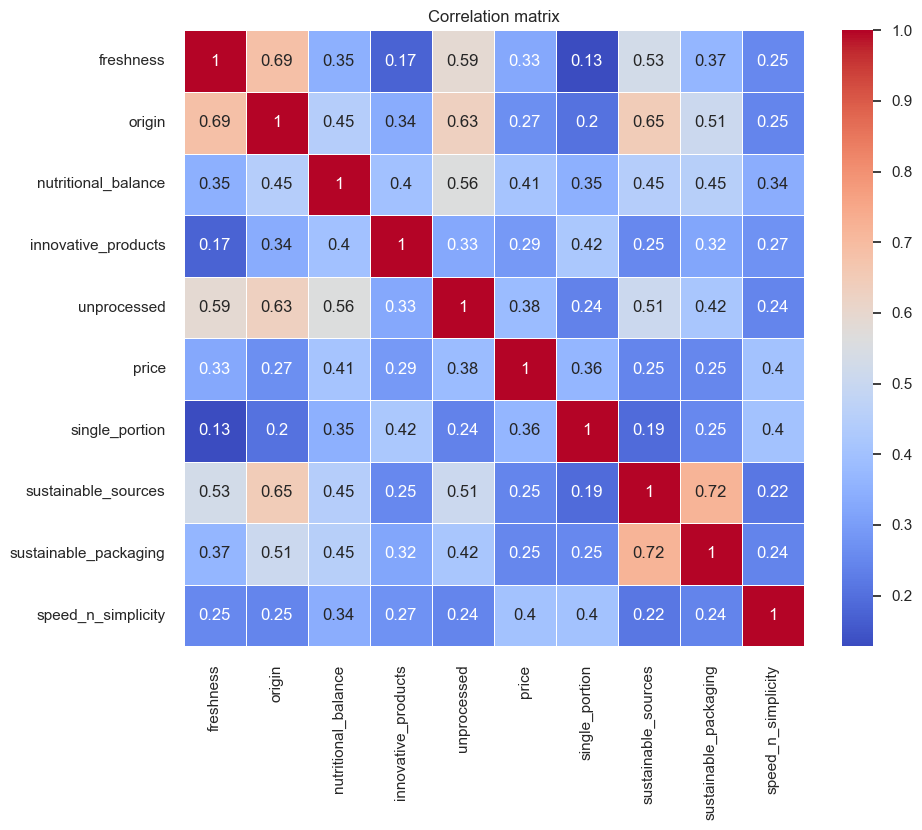

In [17]:
corr_matrix = final_segmentation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

After correlation adjustment, there is a **visible improvement** in the heatmap. 

We can identify subgroups of variables with a medium correlation, which will be useful in the achievement of our goals (e.g. '*sustainable_sources*', '*origin*', '*freshness*', '*unprocessed*').  

---


### **2.2. Clustering**

We continued the analysis by applying clustering techniques to the data, starting with K-Means.

#### **2.2.1. Optimal number of clusters**

At first, we computed the **optimal number of clusters** using the Elbow Method and the Silhouette Score.

- **Elbow Method**

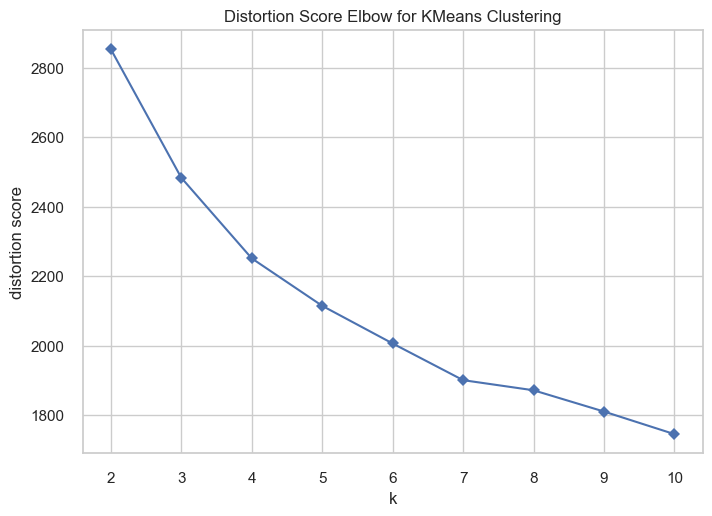

In [18]:
model = KMeans()
visualizer = KElbowVisualizer(model,timings=False, locate_elbow= False)
visualizer.fit(final_segmentation_data)
visualizer.show();

- **Silhouette Method**

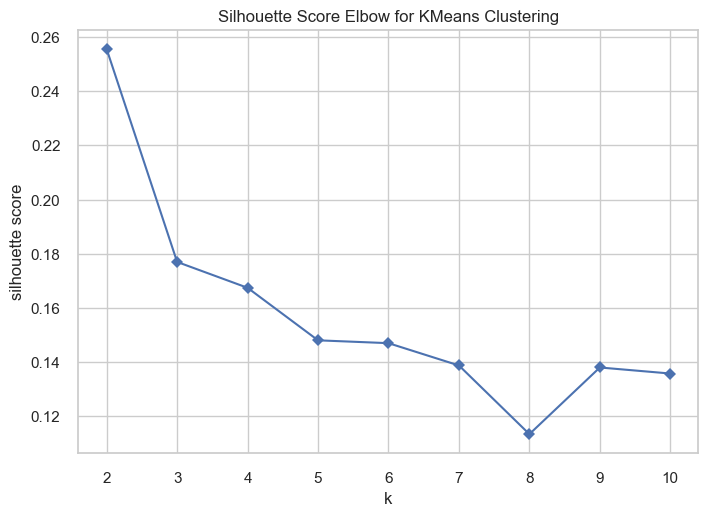

In [19]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False, locate_elbow= False)
visualizer.fit(final_segmentation_data)
visualizer.show();

Running multiple times the optimal number of clusters analysis, each time we found a lot of variability in results. This suggests a lack of stability in the clustering outcomes. The possible reasons could be:

* **Weak cluster separation**. K-Means clustering is highly sensitive to the initialization of centroids, which can result in varying cluster assignments and metrics like the Silhouette Score and Distortion Score. This variability, coupled with weak cluster separations in the data (evidenced by the drop in the Silhouette Score after k=2), suggests that the clustering structure may not be well-defined. Consequently, K-Means might struggle to produce stable and meaningful clusters.
* **Highly skewed distributions**.  Variables such as freshness, origin, nutritional_balance, and sustainable_sources are heavily skewed towards higher values (e.g., ratings of 4 or 5). This reduces variability in the data, causing clusters to overlap or making it difficult for K-Means to find distinct boundaries.


Next, we performed clustering with K=4 and K=2 to understand if there are significant differences between clusters or the results above confirm our hypothesis.

---


#### **2.2.2. K-Means (k=2)**

In [20]:
# K-Means and assign clusters to data
kmeans2 = KMeans(n_clusters = 2, random_state=42)
kmeans2.fit(final_segmentation_data)
final_segmentation_data_2 = final_segmentation_data.copy()
final_segmentation_data_2['Cluster_KMeans'] = kmeans2.labels_ + 1

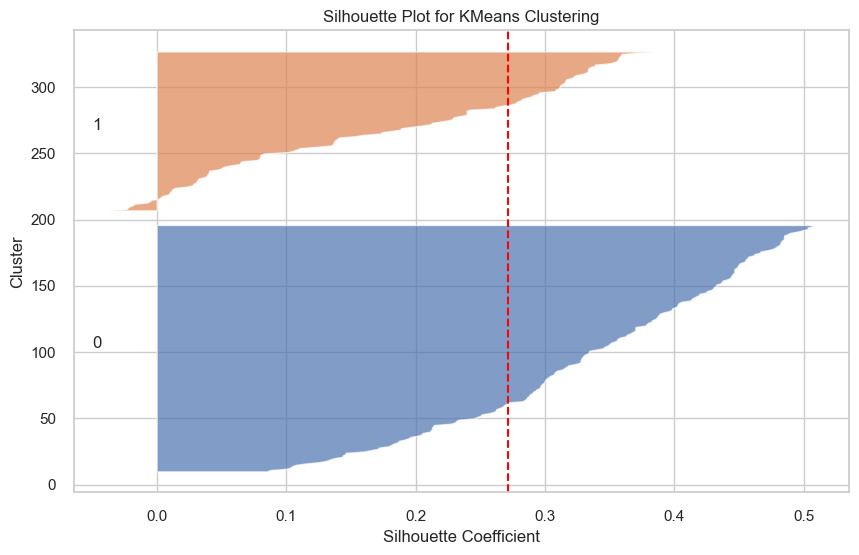

Silhouette Score: 0.27171684341213087


In [21]:
# Silhouette Plot
cluster_labels = kmeans2.fit_predict(final_segmentation_data_2)
silhouette_vals = silhouette_samples(final_segmentation_data_2, cluster_labels)
silhouette_avg = silhouette_score(final_segmentation_data_2, cluster_labels)
n_clusters = 2
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

print("Silhouette Score:", silhouette_avg)

In [22]:
# Compute Clusters' size
cluster_sizes = final_segmentation_data_2['Cluster_KMeans'].value_counts()
cluster_percentages = (cluster_sizes / cluster_sizes.sum()) * 100

cluster_summary = pd.DataFrame({
    'Cluster': cluster_sizes.index,
    'Count': cluster_sizes.values,
    'Percentage': cluster_percentages.values
})

cluster_summary = cluster_summary.sort_values(by='Cluster').reset_index(drop=True)
cluster_summary

Cluster  Count  Percentage
0        1    187   60.714286
1        2    121   39.285714

In [23]:
# Compute centroids' means
centroids2 = final_segmentation_data_2.groupby("Cluster_KMeans").mean().T
centroids2.insert(0,"Population",final_segmentation_data_2.mean())
centroids2.round(2)

Cluster_KMeans         Population     1     2
freshness                    4.29  4.71  3.63
origin                       3.88  4.52  2.88
nutritional_balance          3.69  4.26  2.81
innovative_products          2.60  2.97  2.02
unprocessed                  3.94  4.48  3.09
price                        3.90  4.13  3.53
single_portion               2.77  3.17  2.17
sustainable_sources          3.82  4.41  2.91
sustainable_packaging        3.65  4.27  2.68
speed_n_simplicity           3.32  3.61  2.88

In [24]:
X = final_segmentation_data_2.copy()

def style_cols(col):
    if col.name == "Population": return ["background-color: white"]*len(col)
    
    segment = X[X.Cluster_KMeans == col.name]
    rest_pop = X[X.Cluster_KMeans != col.name]
    
    colors = []
    for var_name, var_segment_mean in col.items():
        t_test, p_value = stats.ttest_ind(segment[var_name], rest_pop[var_name],equal_var=False)
        #_,p_value,_ = st.ttest_ind(segment[var_name],rest_pop[var_name],usevar="unequal")    
        if p_value < 0.05:
            color = "background-color: green" if var_segment_mean > rest_pop[var_name].mean() else "background-color: red"
        elif p_value < 0.1:
            color = "background-color: #90ee90" if var_segment_mean > rest_pop[var_name].mean() else "background-color: #f1807e"
        else: color = "background-color: white"
        colors.append(color)
    return colors

centroids2.style.apply(style_cols).format("{:.2f}")

Cluster 1 has consistently high values across all variables, while Cluster 2 shows consistently low values. This indicates a weak separation, with clusters primarily defined by overall rating levels, proving that clustering is inefficient.

---


#### **2.2.3. K-Means (k=4)**

In [25]:
# Compute KMeans and assign clusters to data
kmeans4 = KMeans(n_clusters = 4, random_state=42)
kmeans4.fit(final_segmentation_data)
final_segmentation_data_4 = final_segmentation_data.copy()
final_segmentation_data_4['Cluster_KMeans'] = kmeans4.labels_ +1
final_segmentation_data_4

freshness  origin  nutritional_balance  innovative_products  \
respondent_id                                                                
0                      4       3                    4                    1   
1                      5       3                    3                    2   
2                      5       4                    5                    2   
3                      5       3                    4                    1   
4                      5       5                    4                    2   
...                  ...     ...                  ...                  ...   
341                    5       5                    5                    5   
342                    4       3                    1                    2   
343                    1       1                    1                    1   
344                    4       4                    3                    2   
345                    5       4                    4                    3   

               unprocessed  price  single_portion  sustainable_sources  \
respondent_id                                                            
0                        2      5               2                    5   
1                        4      4               4                    5   
2                        3      4               4                    3   
3                        5      4               1                    3   
4                        5      5               5                    5   
...                    ...    ...             ...                  ...   
341                      4      5               4                    4   
342                      4      5               3                    4   
343                      1      5               5                    1   
344                      3      4               3                    3   
345                      4      4               1                    4   

               sustainable_packaging  speed_n_simplicity  Cluster_KMeans  
respondent_id                                                             
0                                  4                 2.5               4  
1                                  5                 4.0               4  
2                                  3                 2.5               1  
3                                  3                 2.5               4  
4                                  5                 5.0               3  
...                              ...                 ...             ...  
341                                5                 3.0               3  
342                                4                 1.0               1  
343                                1                 5.0               2  
344                                4                 3.5               1  
345                                4                 3.5               4  

[308 rows x 11 columns]

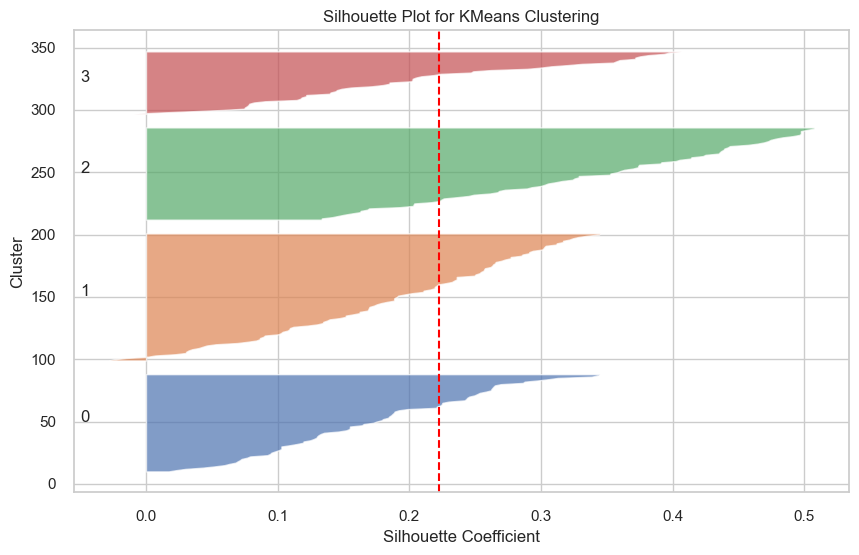

Silhouette Score: 0.22220700779410574


In [26]:
# Silhouette Plot
cluster_labels = kmeans4.fit_predict(final_segmentation_data_4)
silhouette_vals = silhouette_samples(final_segmentation_data_4, cluster_labels)
silhouette_avg = silhouette_score(final_segmentation_data_4, cluster_labels)
n_clusters = 4
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

print("Silhouette Score:", silhouette_avg)

In [27]:
# Compute Clusters' size
cluster_sizes = final_segmentation_data_4['Cluster_KMeans'].value_counts()
cluster_percentages = (cluster_sizes / cluster_sizes.sum()) * 100

cluster_summary = pd.DataFrame({
    'Cluster': cluster_sizes.index,
    'Count': cluster_sizes.values,
    'Percentage': cluster_percentages.values
})

cluster_summary = cluster_summary.sort_values(by='Cluster').reset_index(drop=True)
cluster_summary

Cluster  Count  Percentage
0        1     79   25.649351
1        2     51   16.558442
2        3     75   24.350649
3        4    103   33.441558

In [28]:
# Compute centroids means
centroids4 = final_segmentation_data_4.groupby("Cluster_KMeans").mean().T
centroids4.insert(0,"Population",final_segmentation_data_4.mean())
centroids4.round(2)

Cluster_KMeans         Population     1     2     3     4
freshness                    4.29  4.13  2.90  4.76  4.75
origin                       3.88  3.28  2.43  4.79  4.39
nutritional_balance          3.69  3.52  2.18  4.67  3.85
innovative_products          2.60  2.59  1.69  3.76  2.20
unprocessed                  3.94  3.73  2.45  4.63  4.32
price                        3.90  4.18  2.82  4.67  3.65
single_portion               2.77  3.06  1.80  4.08  2.08
sustainable_sources          3.82  3.16  2.51  4.59  4.42
sustainable_packaging        3.65  2.96  2.33  4.47  4.22
speed_n_simplicity           3.32  3.64  2.31  3.98  3.09

In [29]:
# Compute means table
X = final_segmentation_data_4.copy()
centroids4.style.apply(style_cols).format("{:.2f}")

Cluster 3 and Cluster 4 show consistently high values across most variables, while Cluster 1 and Cluster 2 show lower values, with Cluster 2 being the lowest overall. This pattern suggests a clear separation between high-value clusters (3 and 4) and low-value clusters (1 and 2), but the distinction within each group appears weaker.

---


#### **2.2.4. Hierarchical Clustering**

After performing K-means, we also tried the hierarchical approach.

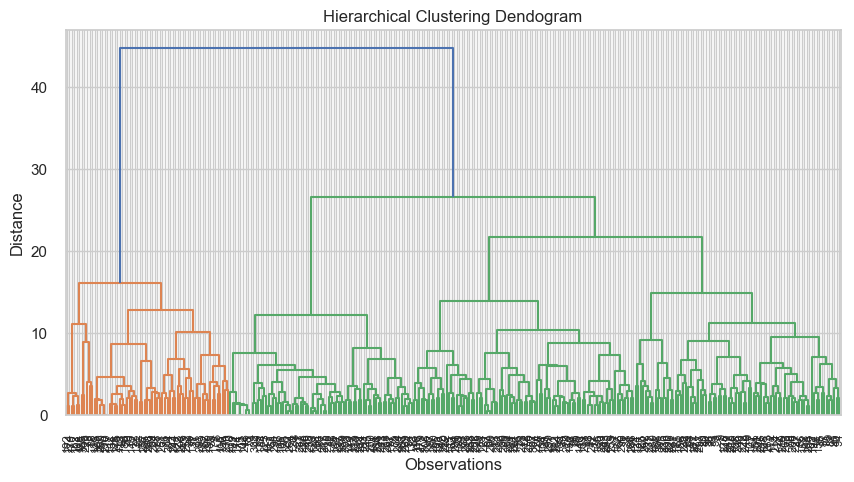

In [30]:
# Hierarchical Clustering
Z = linkage(final_segmentation_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()


Based on visual inspection, **four clusters** seem to be a suitable choice for cutting the dendrogram. To ensure the selection is optimal, we compute the silhouette scores for further validation.

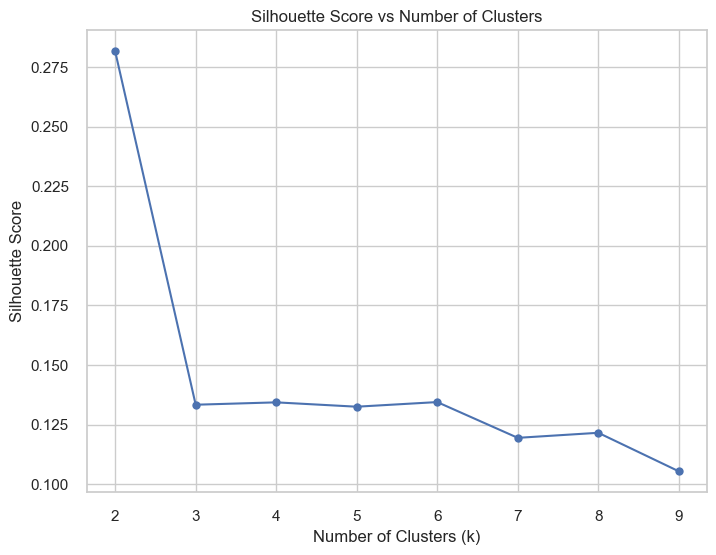

In [31]:
# Silhouette score
silhouette_scores = []
cluster_range = range(2, 10) 

for k in cluster_range:
    labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(final_segmentation_data, labels)
    silhouette_scores.append(score)
    
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

Once again, the suggested number of clusters is 2, but we believe that this might be too few for our data. Therefore, 4 could still be the best solution in this case as well.
We performed the same operations as we did for K-means but noticed that the characteristics of the clusters are almost identical. Therefore, for simplicity, we proceeded with the analysis of K-means results.

---


### **2.3. PCA**

Given the challenges encountered during our analysis and the poor separation of the clusters obtained, we decided to consider **Principal Component Analysis** to gain a better understanding of the data structure and improve the interpretability of our segmentation results.

By applying PCA, we aim to identify the most relevant features that contribute to the differentiation of clusters and assess whether a lower-dimensional representation of the data can enhance the separation between them.

Before proceeding with the PCA, we calculated the **Kaiser-Meyer-Olkin** (KMO), which is a measure of the sample's adequacy for factor analysis. 

In [32]:
kmo_all, kmo_model = calculate_kmo(final_segmentation_data)
print(f"KMO Value: {kmo_model}")

KMO Value: 0.8457551794181936


A KMO value of 0.846 indicates that the data are **suitable for PCA**, supporting the decision to proceed with this technique for variable reduction.

---


#### **2.3.1. Principal Components**

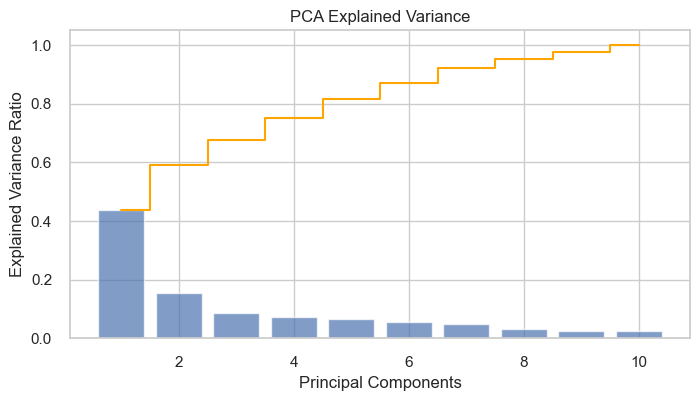

In [33]:
# PCA
pca_full = PCA(n_components=len(final_segmentation_data.columns))
principal_components_full = pca_full.fit_transform(final_segmentation_data)
explained_variance = pca_full.explained_variance_ratio_
explained_variance_percent = explained_variance * 100 
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', color='orange')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

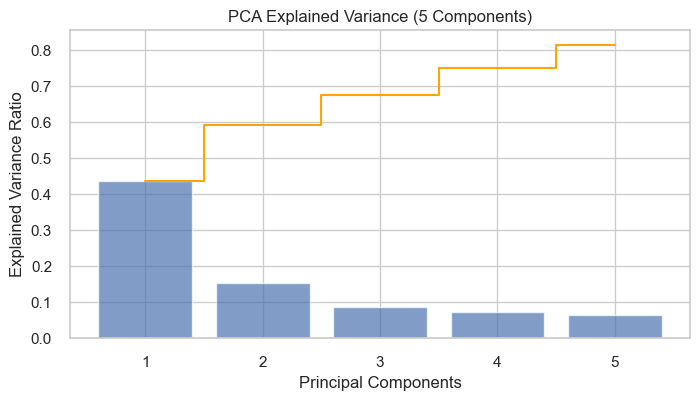

Explained variance per component: [0.43791451 0.1532498  0.08571788 0.07275902 0.06489671]
Cumulative explained variance: [0.43791451 0.59116432 0.67688219 0.74964121 0.81453792]


In [34]:
# PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(final_segmentation_data)

# Create a DataFrame with the 5 principal components
pca_df = pd.DataFrame(principal_components, 
                      columns=['PC1','PC2','PC3','PC4','PC5'])

# Explained variance ratios for the 5 PCs
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


# Plot explained variance
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, 
         where='mid', color='orange')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance (5 Components)')
plt.show()

print("Explained variance per component:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)

Using 5 principal components, the cumulative explained variance is approximately **81.45%**.

In [35]:
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=final_segmentation_data.columns
)

print("PCA Loadings (Coefficients):")
print(loadings)

for pc in loadings.columns:
    # Sort by absolute value to find highest magnitude (positive or negative)
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    top_features = sorted_loadings.head(5) 
    print(f"\nTop loadings for {pc}:")
    print(top_features)

PCA Loadings (Coefficients):
                            PC1       PC2       PC3       PC4       PC5
freshness              0.290192 -0.277332 -0.381556  0.009444 -0.352309
origin                 0.374445 -0.294280 -0.107446  0.140588 -0.364213
nutritional_balance    0.363140  0.078082 -0.061512  0.193274  0.635066
innovative_products    0.277948  0.319165  0.315480  0.674411 -0.047230
unprocessed            0.336029 -0.150646 -0.274893  0.260338  0.010167
price                  0.241113  0.224056 -0.415531 -0.125268  0.279361
single_portion         0.289727  0.651848  0.158921 -0.211251 -0.459084
sustainable_sources    0.357426 -0.317366  0.272023 -0.249371 -0.028263
sustainable_packaging  0.365565 -0.198513  0.551036 -0.340999  0.196881
speed_n_simplicity     0.223762  0.300989 -0.297378 -0.425910  0.096036

Top loadings for PC1:
origin                   0.374445
sustainable_packaging    0.365565
nutritional_balance      0.363140
sustainable_sources      0.357426
unprocessed         

- **PC1: “Origin Awareness and Sustainability”**: represents a strong focus on sustainability and product origin.
Individuals with high scores on this component prefer products with certified origin, sustainably packaged, and sourced from environmentally responsible suppliers.


- **PC2: “Practicality”**: highlights a strong orientation toward practicality.
Individuals with high scores on this component prefer products that are quick and easy to prepare, often in single-portion formats.


- **PC3: “Price and Sustainability”**: combines sustainability, cost, and quality.
Individuals with high scores on this component seek a balance between price, freshness, and sustainable packaging, indicating a responsible yet economically conscious consumption.


- **PC4: “Innovation and Simplicity”**: reflects an interest in innovative products that simplify life.
Individuals with high scores on this component appreciate modern and technological solutions that make product use or consumption faster and more convenient.


- **PC5: “Nutritional Control”**: emphasizes the importance of health and dietary control.
Individuals with high scores on this component prefer products that offer optimal nutritional balance and well-defined portions, reflecting a focus on diet management.

---


#### **2.3.2. Optimal number of clusters**

- **Elbow Method**

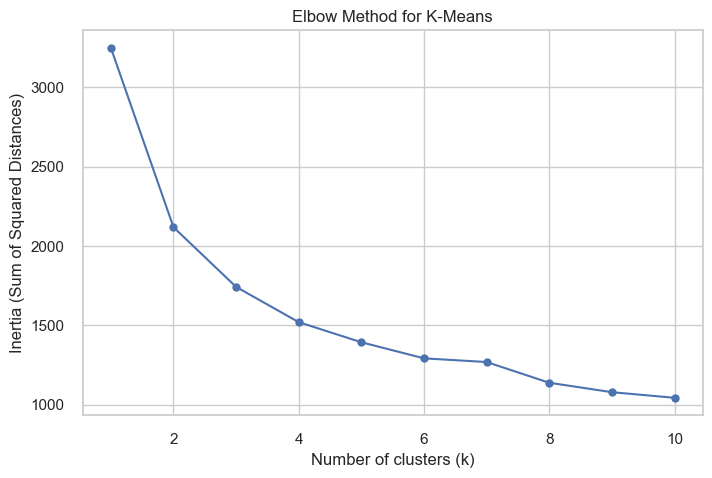

In [36]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

Based on the elbow method, K=4 or K=2 could be a reasonable choice, as the inertia decreases at a slower rate beyond these points.

---


#### **2.3.3. K-Means (k=4)**

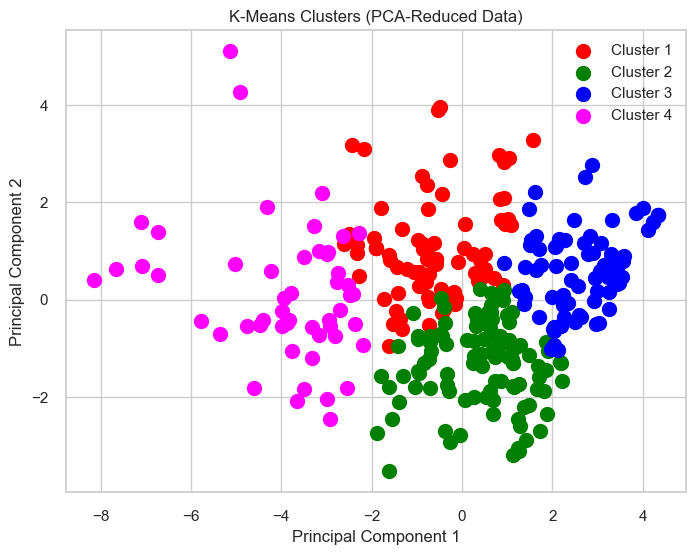

In [37]:
if 'Cluster' in pca_df.columns:
    pca_df.drop('Cluster', axis=1, inplace=True)
    
# Fit K-Means
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df[['PC1','PC2', 'PC3', 'PC4', 'PC5']]) 

pca_df['Cluster'] = kmeans.labels_ + 1

# Plot each cluster with a different color
colors = ['red', 'green', 'blue', 'magenta', 'orange']
plt.figure(figsize=(8,6))

for cluster_label in range(1, k + 1):
    subset = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        s=100, 
        c=colors[cluster_label - 1], 
        label=f'Cluster {cluster_label}'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (PCA-Reduced Data)')
plt.legend()
plt.show()

In [38]:
score = silhouette_score(pca_df[['PC1','PC2','PC3','PC4','PC5']], pca_df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.22150356675028918


In [39]:
final_segmentation_data['Cluster'] = pca_df['Cluster']

# Compute mean of original variables by cluster
cluster_means = final_segmentation_data.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         freshness    origin  nutritional_balance  innovative_products  \
Cluster                                                                  
1.0       4.333333  3.863636             3.666667             2.636364   
2.0       4.406593  3.813187             3.670330             2.681319   
3.0       4.375000  4.138889             3.819444             2.736111   
4.0       3.930233  3.511628             3.534884             2.279070   

         unprocessed     price  single_portion  sustainable_sources  \
Cluster                                                               
1.0         3.863636  4.015152        2.818182             3.818182   
2.0         3.934066  3.934066        2.747253             3.890110   
3.0         4.069444  3.861111        2.708333             4.000000   
4.0         3.790698  3.697674        2.720930             3.511628   

         sustainable_packaging  speed_n_simplicity  
Cluster                                             
1.0    

- **Cluster 1: “Conscious Consumers”**. The members of this group particularly value freshness, origin, and sustainability, while also giving importance to price. They do not prioritize innovative products but pay attention to overall quality and nutritional balance.

- **Cluster 2: “Balanced Buyers”**. The members of this cluster exhibit a balanced behavior, assigning importance across various dimensions: freshness, origin, nutritional balance, sustainability, and price.

- **Cluster 3: “Eco-Engaged Innovators”**. The members of this cluster stand out for their high attention to sustainability (both sources and packaging) and greatly appreciate unprocessed foods. However, they do not overlook freshness and product origin.

- **Cluster 4: “Traditional Simplicity Seekers”**. The members of this cluster take a more traditional approach, with less interest in innovation and sustainability. Nevertheless, they value freshness, origin, and simplicity in their choices.

---


#### **2.3.4. Clusters Analysis (k=2)**

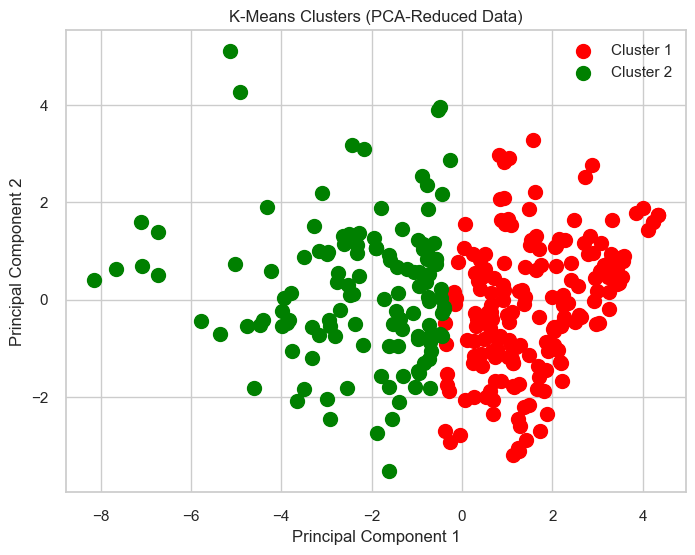

In [40]:
if 'Cluster' in pca_df.columns:
    pca_df.drop('Cluster', axis=1, inplace=True)
    
# Fit K-Means
k=2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df[['PC1','PC2', 'PC3', 'PC4', 'PC5']])

pca_df['Cluster'] = kmeans.labels_ + 1

# Plot each cluster with a different color
colors = ['red', 'green']
plt.figure(figsize=(8,6))

for cluster_label in range(1, k + 1):
    subset = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        s=100, 
        c=colors[cluster_label - 1], 
        label=f'Cluster {cluster_label}'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (PCA-Reduced Data)')
plt.legend()
plt.show()

In [41]:
score = silhouette_score(pca_df[['PC1','PC2','PC3','PC4','PC5']], pca_df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.3052997283228182


In [42]:
final_segmentation_data['Cluster'] = pca_df['Cluster']

# Compute mean of original variables by cluster
cluster_means = final_segmentation_data.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         freshness    origin  nutritional_balance  innovative_products  \
Cluster                                                                  
1.0       4.355828  3.975460             3.791411             2.730061   
2.0       4.229358  3.697248             3.532110             2.458716   

         unprocessed     price  single_portion  sustainable_sources  \
Cluster                                                               
1.0         4.018405  3.938650        2.730061             3.987730   
2.0         3.798165  3.834862        2.779817             3.623853   

         sustainable_packaging  speed_n_simplicity  
Cluster                                             
1.0                   3.828221            3.319018  
2.0                   3.366972            3.302752  


- **Cluster 1: “Sustainability Enthusiasts”**. Individuals in this cluster place great importance on sustainability (both sources and packaging), freshness, and the origin of products, while also giving significant weight to price. They also appreciate unprocessed foods and a good nutritional balance. However, they show little interest in innovative products and single portions.

- **Cluster 2: “Traditional Value Seekers”**. Individuals in this cluster take a more traditional approach, giving less importance to packaging sustainability and freshness compared to Cluster 1. They show very little interest in innovative products but still value nutritional balance, product origin, and the sustainability of sources.

Comparing the results obtained with PCA to those obtained previously, we did not observe a significant improvement in cluster separation. Although PCA allowed us to reduce the dimensionality of the data and visualize the clusters in a lower-dimensional space, the overall structure remained similar to the original analysis. The silhouette scores did not show a substantial increase, indicating that the application of PCA did not lead to more distinct or well-defined clusters.

---


### **2.4. Variable selection**

Since the results obtained so far have not been satisfactory, we conducted further analyses by selecting a reduced set of variables for clustering, excluding those that showed significant skewness. However, at this stage, we decided to retain the price variable despite its asymmetric distribution, as it could capture meaningful patterns and underlying trends that could be relevant to the analysis.

In [43]:
reduced_data = final_segmentation_data[['innovative_products', 'price', 'single_portion', 'speed_n_simplicity']]
reduced_data.head()

innovative_products  price  single_portion  speed_n_simplicity
respondent_id                                                                
0                                1      5               2                 2.5
1                                2      4               4                 4.0
2                                2      4               4                 2.5
3                                1      4               1                 2.5
4                                2      5               5                 5.0

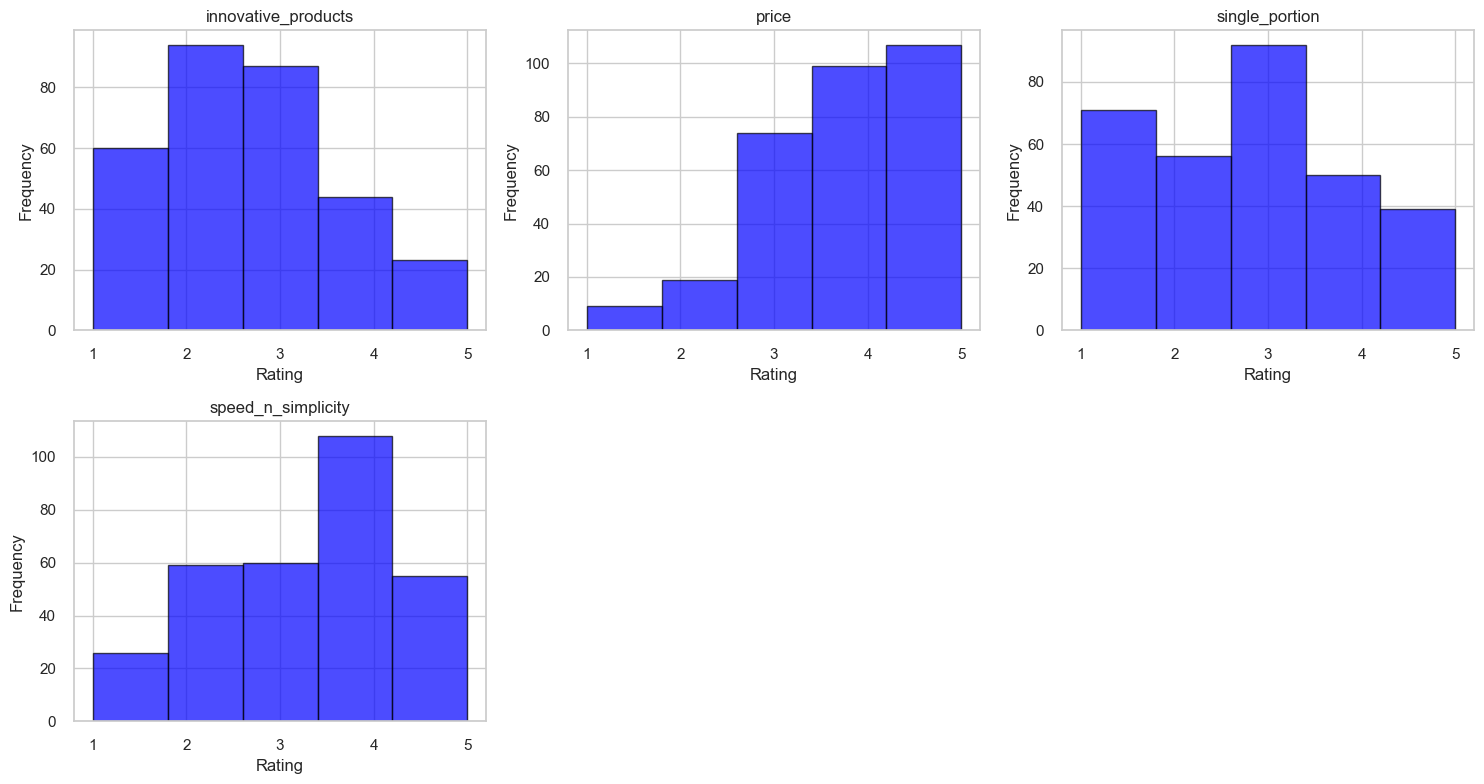

In [44]:
num_variables = len(reduced_data.columns) 
num_rows = num_variables // 3 + (num_variables % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4), tight_layout=True)
axes = axes.flatten()

for index, column in enumerate(reduced_data.columns):
    axes[index].hist(reduced_data[column], bins=5, range=(1, 5), alpha=0.7, color='blue', edgecolor='black')
    axes[index].set_title(column)
    axes[index].set_xlabel('Rating')
    axes[index].set_ylabel('Frequency')
    axes[index].set_xticks(range(1, 6))

for i in range(index + 1, len(axes)):
    axes[i].axis('off')

plt.show()

---


#### **2.4.1. Optimal number of clusters**.

- **Elbow method**

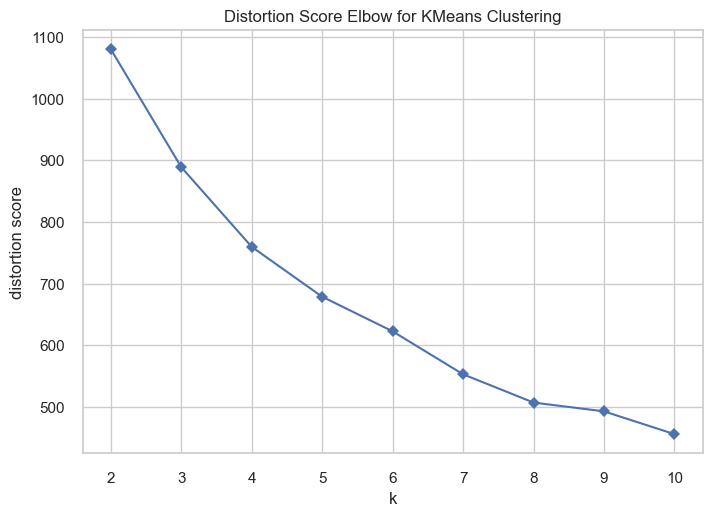

In [45]:
model = KMeans()
visualizer = KElbowVisualizer(model,timings=False, locate_elbow= False)
visualizer.fit(reduced_data)
visualizer.show();

- **Silhouette method**

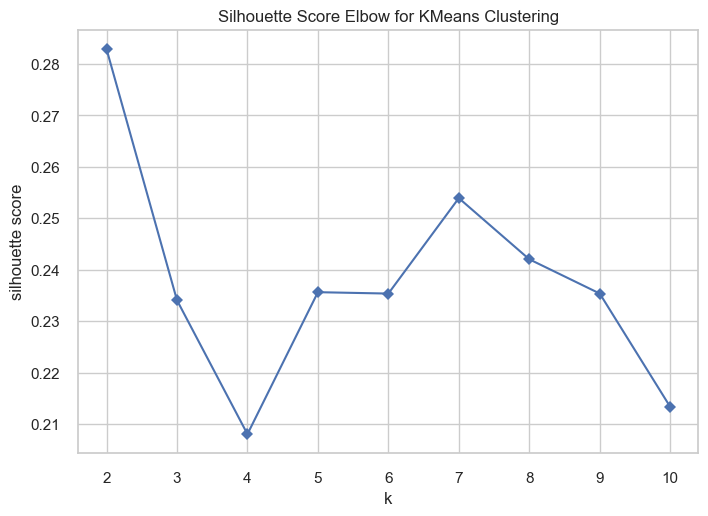

In [46]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False, locate_elbow= False)
visualizer.fit(reduced_data)
visualizer.show();

Based on the plots from both the elbow and silhouette methods, **no optimal number of clusters** clearly emerges, as each method produces inconsistent results with every run. 

This suggests that the data lacks stable and well-separated clusters. The silhouette plot indicates that K=2 yields the highest score, whereas in the elbow plot the inflection point seems to be at K=4, so we decided to apply K-Means clustering with both values to further assess their effectiveness.

---


#### **2.4.2. K-Means (k=2)**

In [47]:
# K-Means and assign clusters to data
reduced_data = reduced_data.copy()
kmeans2 = KMeans(n_clusters = 2, random_state=42)
kmeans2.fit(reduced_data)
reduced_data['Cluster_K2'] = kmeans2.labels_ + 1

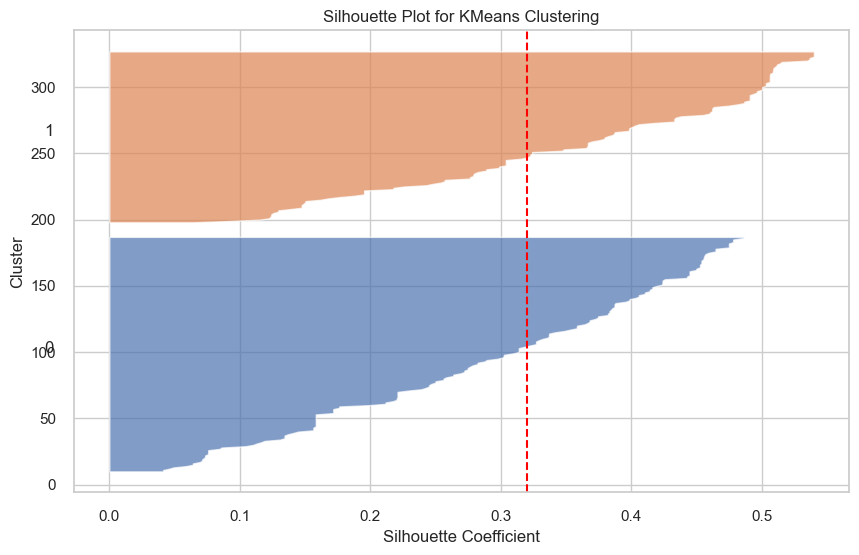

Silhouette Score: 0.32039644786649446


In [48]:
# Silhouette Plot
cluster_labels = kmeans2.fit_predict(reduced_data)
silhouette_vals = silhouette_samples(reduced_data, cluster_labels)
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
n_clusters = 2
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

print("Silhouette Score:", silhouette_avg)

#### **2.4.3. K-Means (k=4)**

In [49]:
# Compute KMeans and assign clusters to data
reduced_data.drop(['Cluster_K2'], axis=1, inplace=True)
kmeans4 = KMeans(n_clusters = 4, random_state=42)
kmeans4.fit(reduced_data)
reduced_data['Cluster_K4'] = kmeans4.labels_ + 1

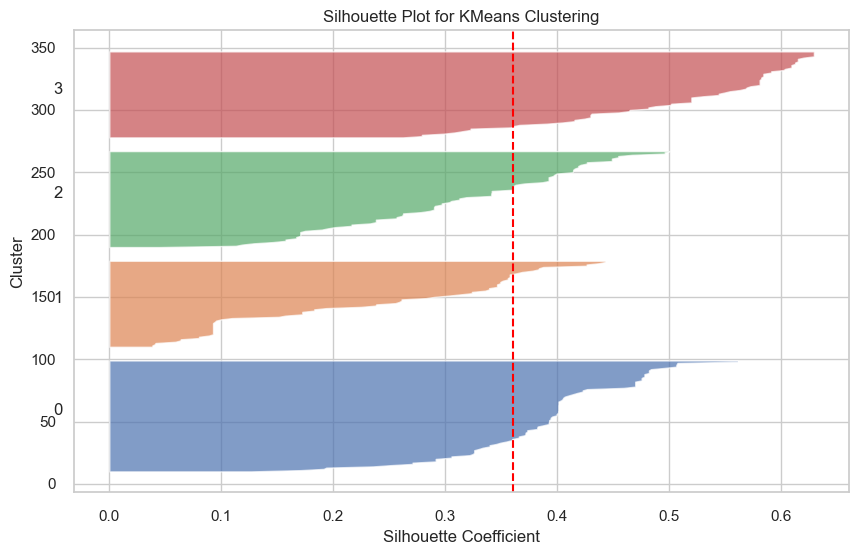

Silhouette Score: 0.36025049701924083


In [50]:
# Silhouette Plot
cluster_labels = kmeans4.fit_predict(reduced_data)
silhouette_vals = silhouette_samples(reduced_data, cluster_labels)
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
n_clusters = 4
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

print("Silhouette Score:", silhouette_avg)

Considering only these variables, there is a slight improvement in the silhouette score values, but they remain low. Therefore, we decided to also exclude the price variable.

In [51]:
reduced_data.drop(['Cluster_K4'], axis=1, inplace=True)
reduced_data2 =  final_segmentation_data[['innovative_products', 'single_portion', 'speed_n_simplicity']]
reduced_data2.head()

innovative_products  single_portion  speed_n_simplicity
respondent_id                                                         
0                                1               2                 2.5
1                                2               4                 4.0
2                                2               4                 2.5
3                                1               1                 2.5
4                                2               5                 5.0

- **Elbow method**

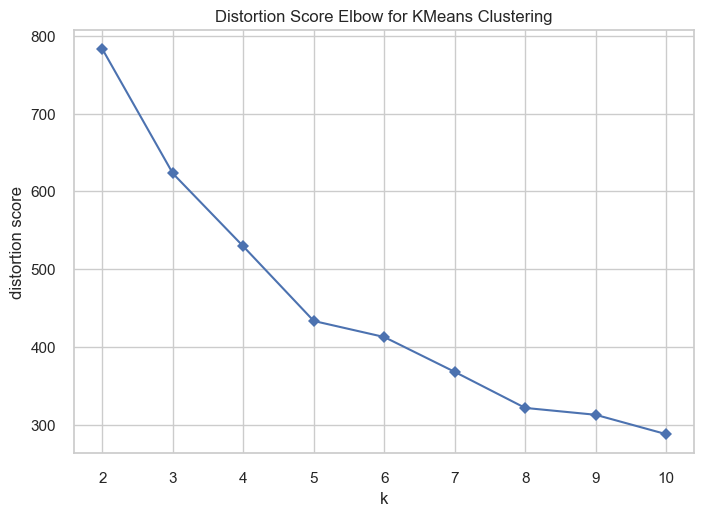

In [52]:
model = KMeans()
visualizer = KElbowVisualizer(model,timings=False, locate_elbow= False)
visualizer.fit(reduced_data2)
visualizer.show();

- **Silhouette method**

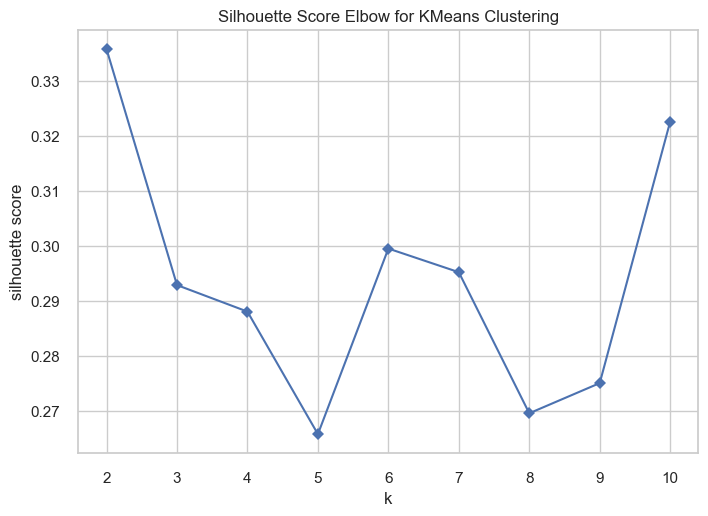

In [53]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False, locate_elbow= False)
visualizer.fit(reduced_data2)
visualizer.show();

Once again, an optimal number of clusters does not clearly emerge, and the results change when rerunning the plots, indicating that the clusters are not well separated.

In [54]:
# K-Means and assign clusters to data
reduced_data2 = reduced_data2.copy()
kmeans2 = KMeans(n_clusters = 2, random_state=42)
kmeans2.fit(reduced_data2)
reduced_data2['Cluster_K2'] = kmeans2.labels_ + 1

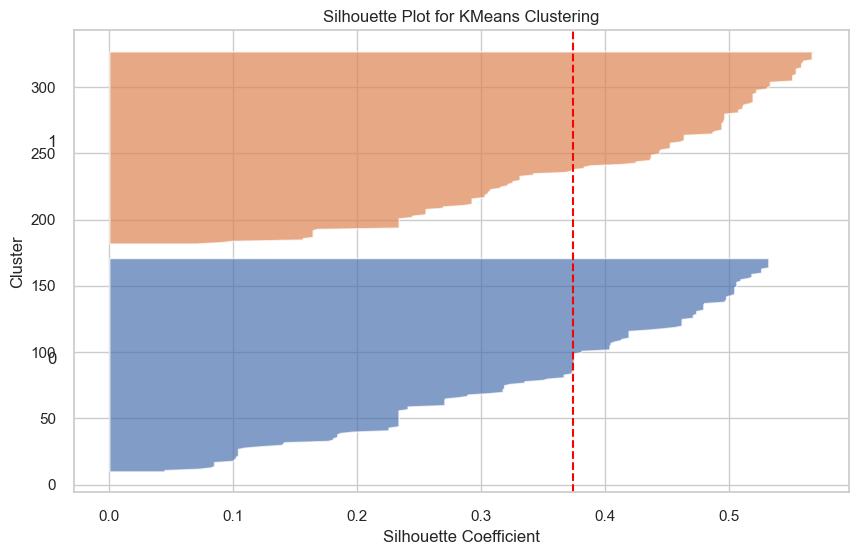

Silhouette Score: 0.3746443292384108


In [55]:
# Silhouette Plot
cluster_labels = kmeans2.fit_predict(reduced_data2)
silhouette_vals = silhouette_samples(reduced_data2, cluster_labels)
silhouette_avg = silhouette_score(reduced_data2, cluster_labels)
n_clusters = 2
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

print("Silhouette Score:", silhouette_avg)

In [56]:
# Compute KMeans and assign clusters to data
reduced_data2.drop(['Cluster_K2'], axis=1, inplace=True)
kmeans4 = KMeans(n_clusters = 4, random_state=42)
kmeans4.fit(reduced_data2)
reduced_data2['Cluster_K4'] = kmeans4.labels_ + 1

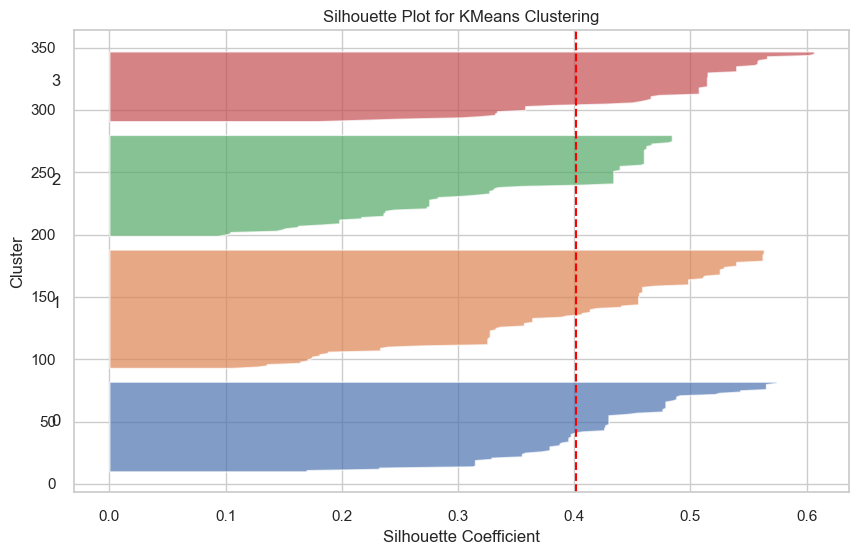

Silhouette Score: 0.40194765380996833


In [57]:
# Silhouette Plot
cluster_labels = kmeans4.fit_predict(reduced_data2)
silhouette_vals = silhouette_samples(reduced_data2, cluster_labels)
silhouette_avg = silhouette_score(reduced_data2, cluster_labels)
n_clusters = 4
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

print("Silhouette Score:", silhouette_avg)

Considering only '*innovative_products*', '*price*', '*single_portion*', and '*speed_n_simplicity*', the silhouette score rises from 0.22 to 0.36 with K=4. Removing 'price' pushes it a bit higher to 0.40—slightly better, but still low. 

Given that this modest improvement comes at the cost of discarding several other variables, it may not be worth to sacrifice so much information for such a small gain. For this reason, we decided to proceed with the upcoming analysis using our previous 4-cluster K-Means analysis complete with all the variables.

---


### **2.5. Clusters Analysis**

#### **2.5.1. Analysis of sample**

For the final considerations, we proceed with analysis of characteristics of the sample in general.

The variables included are the following:
- **age**: the age range of the respondent.
- **region**: the region in Italy where the respondent lives.
- **location**: the type of area the respondent lives in, such as city centre or suburbs.
- **gender**: the gender with which the respondent identifies.
- **family_members**: the number of people in the respondent's household.
- **job**: the respondent's profession.
- **consumption_frequency**: how often the respondent consumes seafood.
- **fish_type**: the type of seafood consumed most frequently at home.
- **meal_preparation_time**: the average time spent preparing meals each day.
- **grocery_responsibility**: how often the respondent is responsible for grocery shopping.
- **grocery_place**: where the respondent most often purchases seafood.
- **WTP_fish**: the amount the respondent is willing to spend on a high-quality seafood product.

In [58]:
descriptor_data = data.iloc[:,1:16]
descriptor_data = descriptor_data.drop(descriptor_data.columns[[6,7,14]], axis=1)

# rename columns
new_names = { 'Qual è la tua età?': 'age', 
              'In che regione vivi?':'region', 
              'In che zona abiti?': 'location',
       'Con quale genere ti identifichi?' : 'gender',
       'Da quanti componenti è formato il tuo nucleo familiare?' : 'family_members',
       'Qual è la tua professione?': 'job',
        'Quanto spesso consumi prodotti ittici?': 'consumption_frequency',
       'Che tipo di prodotti ittici consumi più frequentemente in casa?': 'fish_type',
       'Quanto tempo dedichi mediamente alla preparazione dei pasti durante la giornata?' : 'meal_preparation_time',
       'Solitamente ti occupi tu della spesa nella tua famiglia?': 'grocery_responsibility',
       'Dove acquisti più spesso i tuoi prodotti ittici? (Puoi selezionare più opzioni) ': 'grocery_place',
       'Quanto saresti disposto a spendere per un prodotto ittico di alta qualità (es. burger di pesce gourmet)?': 'WTP_fish'
    
}

descriptor_data = descriptor_data.rename(columns=new_names)
descriptor_data

age     region  \
respondent_id                          
0              18-25 anni  Lombardia   
1              18-25 anni  Lombardia   
2              18-25 anni     Veneto   
3              26-35 anni  Lombardia   
4              60-70 anni  Lombardia   
...                   ...        ...   
341            60-70 anni   Campania   
342            18-25 anni  Lombardia   
343            26-35 anni      Lazio   
344            18-25 anni  Lombardia   
345            60-70 anni  Lombardia   

                                                  location gender  \
respondent_id                                                       
0                                             Centro città   Uomo   
1                                             Centro città   Uomo   
2                                             Centro città  Donna   
3                                          Periferia città  Donna   
4              Esterno (es. campagna/costiera/montagna...)  Donna   
...                                                    ...    ...   
341                                        Periferia città  Donna   
342                                           Centro città   Uomo   
343                                           Centro città   Uomo   
344                                           Centro città  Donna   
345            Esterno (es. campagna/costiera/montagna...)   Uomo   

              family_members         job    consumption_frequency  \
respondent_id                                                       
0                         4+    Studente    Una volta a settimana   
1                        2-3  Lavoratore    Una volta a settimana   
2                          1    Studente    Una volta a settimana   
3                        2-3  Lavoratore  Una o due volte al mese   
4                          1  Lavoratore  Una o due volte al mese   
...                      ...         ...                      ...   
341                      2-3  Lavoratore  Una o due volte al mese   
342                       4+    Studente    Una volta a settimana   
343                        1  Lavoratore  Una o due volte al mese   
344                       4+    Studente    Una volta a settimana   
345                      2-3  Lavoratore  Una o due volte al mese   

                      fish_type meal_preparation_time grocery_responsibility  \
respondent_id                                                                  
0               Pesce surgelato          15-30 minuti          Raramente/Mai   
1               Pesce surgelato          15-30 minuti                A volte   
2                  Pesce fresco          30-60 minuti    Sempre/Quasi sempre   
3                  Pesce fresco          30-60 minuti    Sempre/Quasi sempre   
4               Pesce surgelato          15-30 minuti    Sempre/Quasi sempre   
...                         ...                   ...                    ...   
341             Pesce surgelato          30-60 minuti                A volte   
342                Pesce fresco          30-60 minuti    Sempre/Quasi sempre   
343            Pesce in scatola     Meno di 15 minuti    Sempre/Quasi sempre   
344             Pesce surgelato          15-30 minuti    Sempre/Quasi sempre   
345             Pesce surgelato          30-60 minuti    Sempre/Quasi sempre   

                                                   grocery_place  \
respondent_id                                                      
0                                                   Supermercato   
1              Supermercato;Negozi specializzati (es. pescherie)   
2                                    Supermercato;Mercati locali   
3                                                   Supermercato   
4                                                   Supermercato   
...                                                          ...   
341                                                 Supermercato   
342                                                 

In [59]:
# remove emoji
def remove_emojis(text):
    return re.sub(r'[\U00010000-\U0010ffff]', '', text)

descriptor_data = descriptor_data.map(lambda x: remove_emojis(x) if isinstance(x, str) else x)

Let's first examine the distribution of these variables across the entire dataset. 

This allows us to analyze the sample and better understand the underlying patterns in the data.

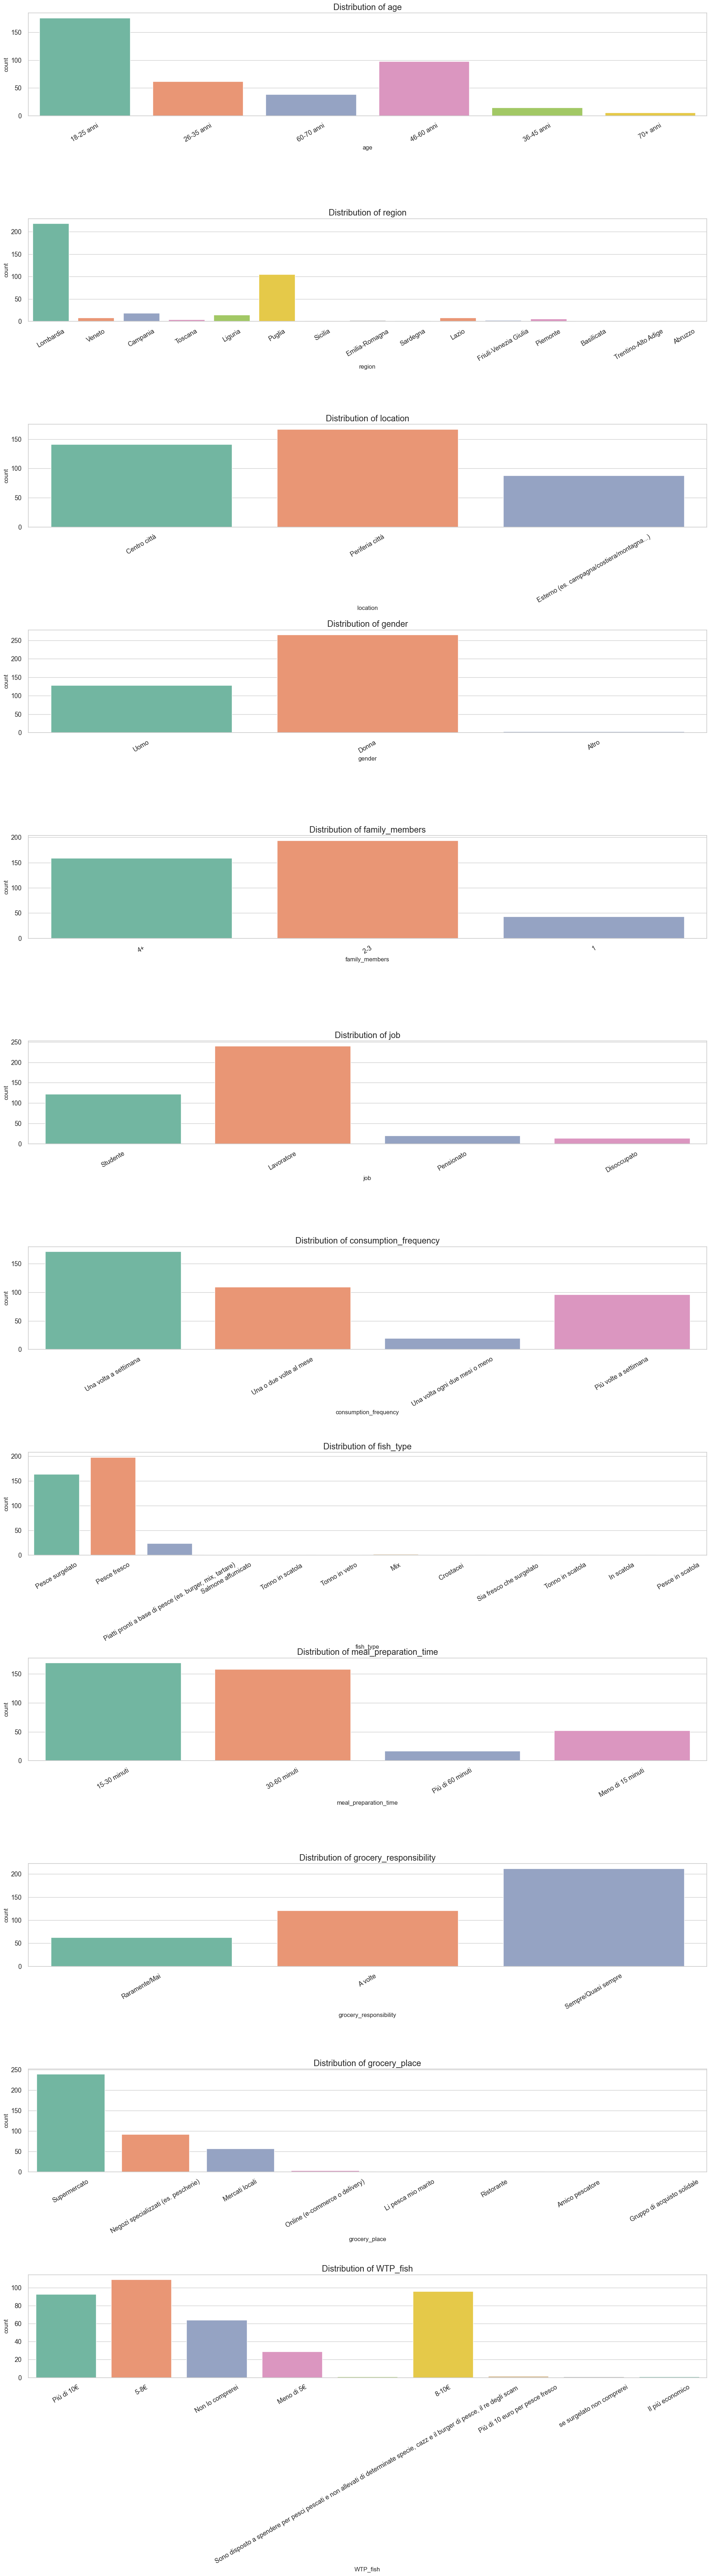

In [60]:
# Plot bar chart for each variable
sns.set(style="whitegrid")

def plot_bar_grid(df, columns, cols=1, explode_columns=None, delimiter=','):
    if explode_columns is None:
        explode_columns = []

    processed_df = df.copy()
    for column in explode_columns:
        if column in processed_df.columns:
            processed_df = processed_df.dropna(subset=[column])
            processed_df[column] = processed_df[column].str.split(delimiter)
            processed_df = processed_df.explode(column)

    total_plots = len(columns)
    rows = (total_plots + cols - 1) // cols 

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6))  
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if column in processed_df.columns:
            sns.countplot(data=processed_df, x=column, hue=column, palette='Set2', legend=False, ax=axes[i])
            axes[i].set_title(f'Distribution of {column}', fontsize=17)
            axes[i].tick_params(axis='x', rotation=30, labelsize=13) 
            axes[i].tick_params(axis='y', labelsize=13) 

    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(hspace=1) 
    plt.show()


columns_to_plot = descriptor_data.columns
plot_bar_grid(
    descriptor_data,
    columns_to_plot,
    cols=1, 
    explode_columns=['grocery_place'], 
    delimiter=';' 
)

**Demographic Characteristics:**
- **age:** the majority of respondents are in the 18-25 years range, making up nearly half of the sample. The second-largest group is the 46-60 years range, followed by 26-35 years. The older age groups (60-70 years and 70+ years) represent a smaller proportion of the sample. This suggests that the sample may be skewed towards younger individuals.
- **region:** the distribution suggests a concentration of respondents in certain regions, particularly in Lombardia and Puglia. Several other regions like Campania, Liguria, and others represent a smaller proportion, and some regions are underrepresented with only a handful of respondents. This may impact the generalizability of the findings if the sample does not reflect the national distribution evenly.
- **location:** this suggests a relatively balanced distribution between urban (city center and suburbs) and more rural areas, although the suburban areas slightly dominate the sample. This could indicate that the survey captures a mix of urban and non-urban experiences but leans slightly towards suburban living.
- **gender:** this distribution indicates a strong skew towards female respondents.
- **family_members:** this suggests that most respondents come from medium to large households, with a relatively smaller group of single-person households.
- **job:** the survey primarily captures perspectives from the working and student populations, with a smaller representation from retirees and the unemployed. The distribution indicates a fairly typical demographic spread of working-age individuals and students, though the sample is more heavily skewed towards those in employment.


**Habits:**
- **consumption_frequency:** seafood is a relatively regular part of many respondents' diets, with a significant number of people consuming it weekly or more frequently. However, there is still a notable portion of the sample that consumes seafood infrequently.
- **fish_type:** this distribution indicates a strong preference for traditional forms of seafood, with fresh and frozen options being the most commonly consumed types.
- **meal_preparation:** only a small portion spends more than an hour preparing meals, while the majority spends an average time of around 30 minutes.
- **grocery_responsibility:** more than half of the people take care of grocery shopping, and only a small portion never do, indicating that the data collected comes from individuals who actually purchase fish, meaning potential customers.
- **grocery_place:** the majority buy from supermarkets, while only a smaller portion purchase from specialized shops or local markets, making them not potential customers since our company sells frozen fish.
- **WTP_fish:** there is a fairly even distribution across all the proposed ranges.

While obtaining a sample through **convenience sampling** allowed us to get a rapid collection of useful data, it presents significant limitations in terms of the representativeness of the general population.

First of all, we can see the over-representation of certain categories, indeed specific groups, such as individuals aged 18–25 and residents of Lombardia and Puglia. This may distort the results and limit the generalizability of the conclusions.

In addiction to this, there is a slight **gender imbalance**, with the predominance of female respondents (over 60%) that may introduce bias.

We can conclude that we do not have a perfectly representative sample of the entire population, but we do have votes for some categories, and if the limitations are properly taken into account, we could still conduct a good analysis.

---


#### **2.5.2. Analysis of clusters**

After analyzing demographic information, we now examine the specific characteristics of each cluster to identify patterns and differences.

In [61]:
descriptor_data['Cluster_K2'] = final_segmentation_data_2['Cluster_KMeans']
descriptor_data['Cluster_K4'] = final_segmentation_data_4['Cluster_KMeans']

To gain some insights, we created **pie charts of the distribution of variables across each cluster**.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10304\3132827631.py:20: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


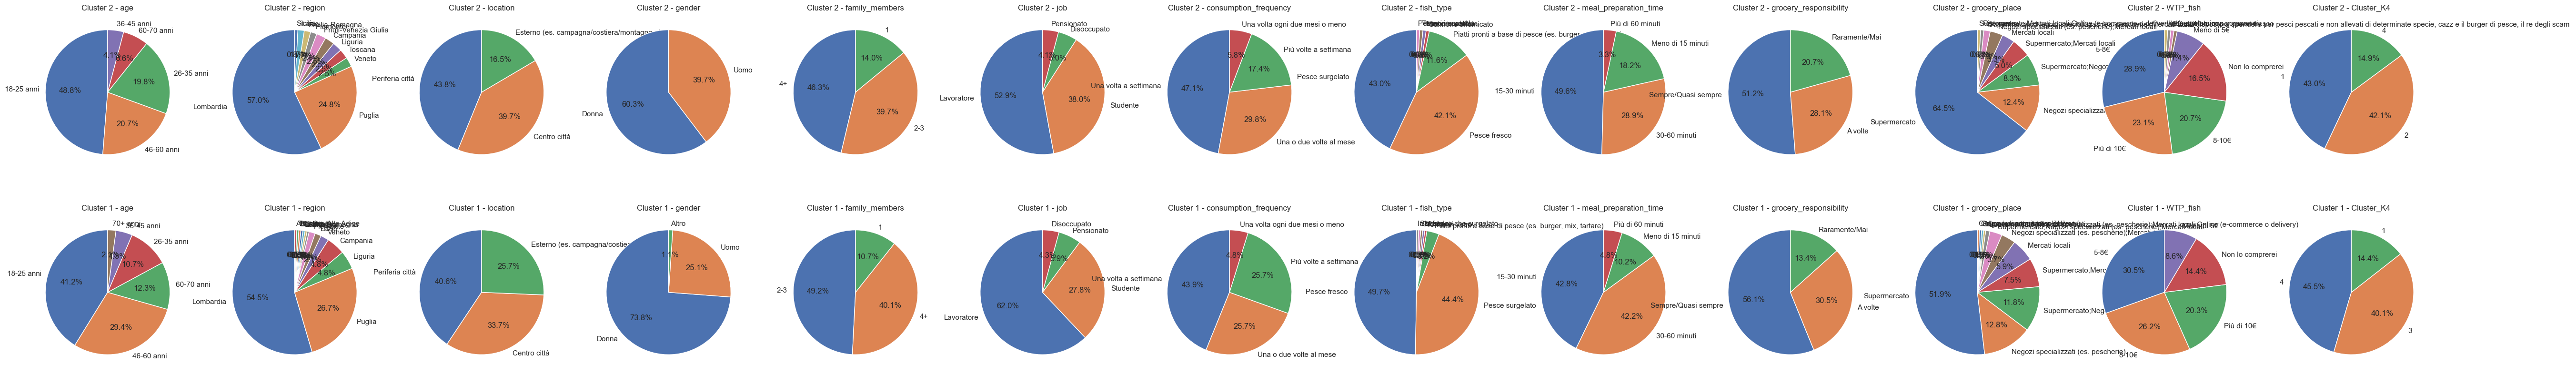

In [62]:
clusters = descriptor_data['Cluster_K2'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster_K2', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters)) 

if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster_K2'] == cluster]
    for j, var in enumerate(variables):
        counts = cluster_data[var].value_counts()
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()

**Analysis with K=2**:
- **Cluster 1:** this cluster highly values freshness, origin, and unprocessed products. They also place significant importance on sustainable packaging and sources, suggesting a strong environmental awareness. Less importance is placed on innovative products, single portions, and the speed and simplicity of product preparation. This indicates a preference for traditional products that do not necessarily require quick preparation or come pre-packaged in single servings. 
Predominantly female under 35 years old, a large portion (42,2%) spend 30-60 minutes on meal preparation. Mostly, they buy fish at supermarkets, but there are also modest percentages who purchase from fish shops and local markets.
- **Cluster 2:** low importance is placed on attributes like freshness, origin and sustainable aspects. This cluster seems to prioritize convenience and price over other factors.
More gender-balanced, mainly students, spend less time preparing meals, consume fish less frequently, mainly buy fish products at supermarkets.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10304\977047102.py:20: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


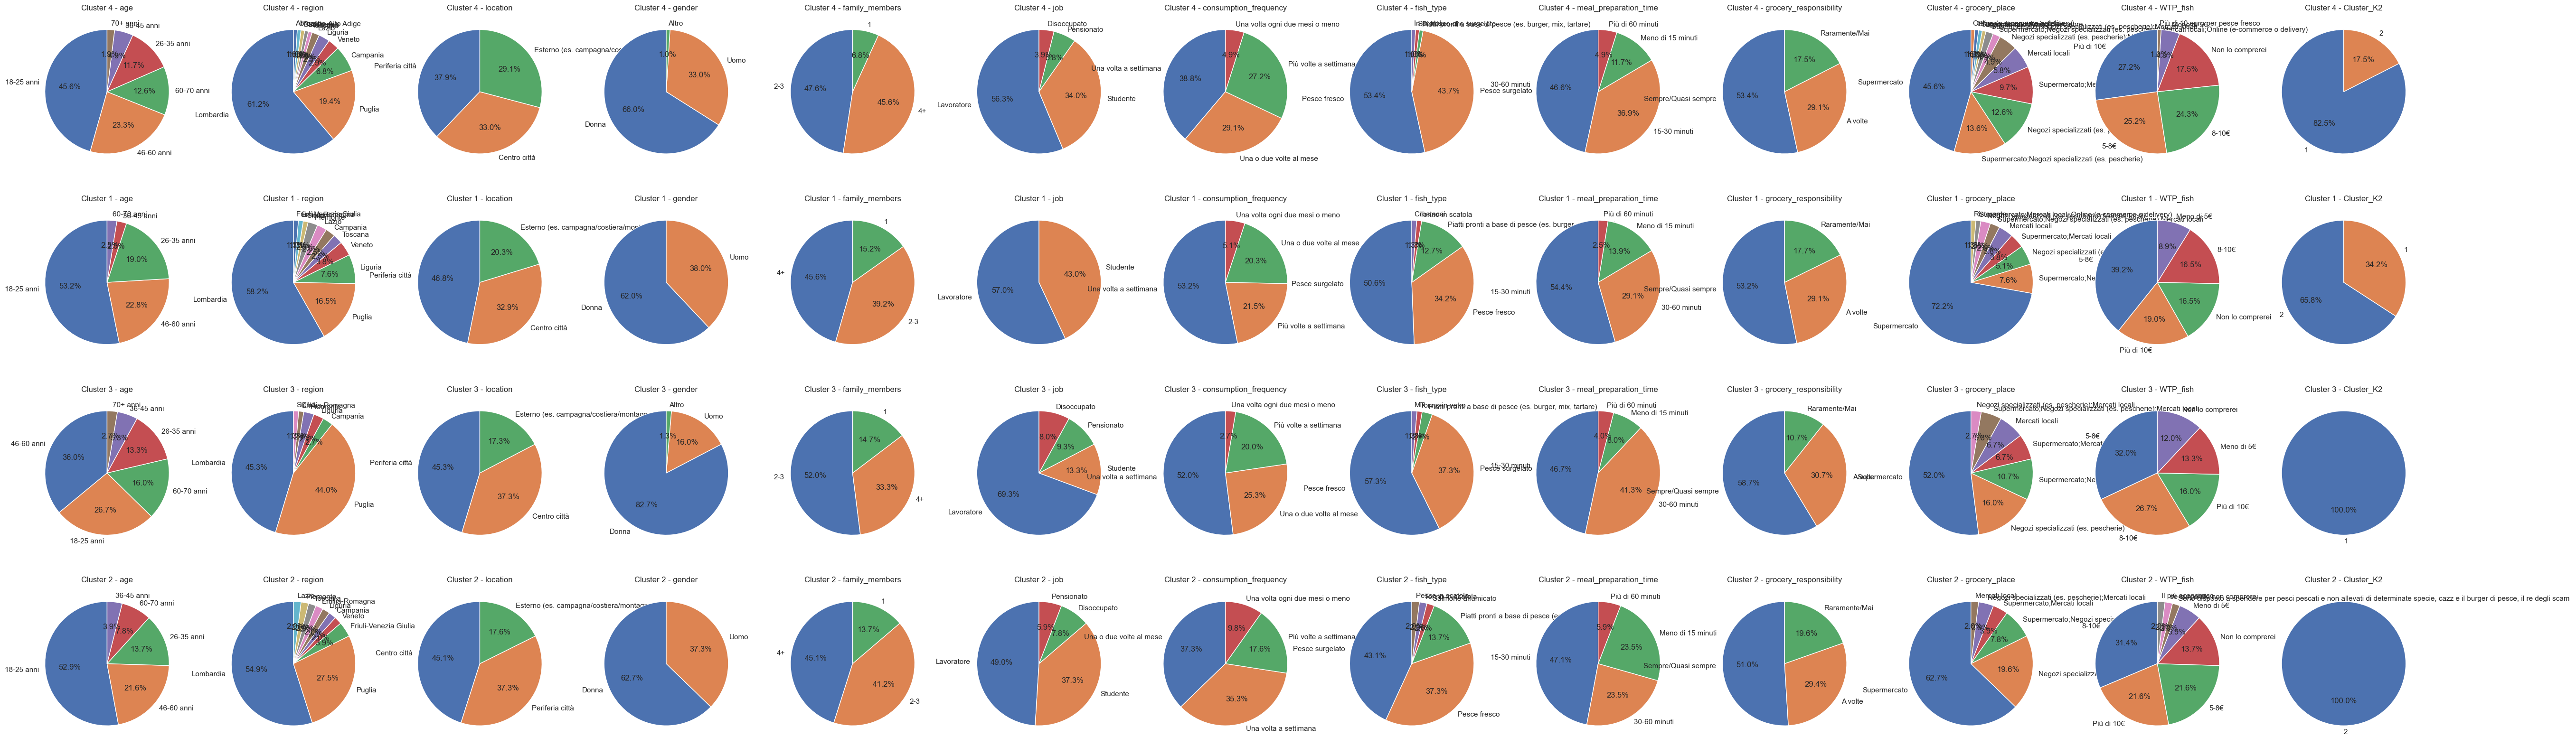

In [63]:
clusters = descriptor_data['Cluster_K4'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster_K4', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters))

if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster_K4'] == cluster]
    for j, var in enumerate(variables): 
        counts = cluster_data[var].value_counts()
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()

**Analysis with K=4**
- **Cluster 1:**  this group highly values **freshness**, **price**, and **unprocessed products**, but shows less interest in **innovative products** and **sustainable packaging**. Primarily composed of younger individuals aged **18-35**, with a balanced mix of workers and students. They mainly shop at supermarkets and spend little time on meal preparation, often opting for ready-made or frozen meals. Despite their interest in freshness, their budget constraints and lifestyle drive them to prioritize affordability over quality, highlighting a potential aspiration for fresh fish that is not always met in practice.

- **Cluster 2:**  this group exhibits the **lowest interest across all attributes**, showing little importance for **freshness**, **origin**, or **sustainability**, and consuming the least amount of fish. The majority are younger individuals, mainly under **35 years old**, who spend minimal time cooking and tend to prefer ready-made products. This group represents the least engaged segment with minimal attachment to fish consumption and its attributes.

- **Cluster 3:**  this is the **most demanding group**, placing high importance on **freshness**, **origin**, and **sustainability** across all variables. A significant portion of this cluster is women (**82.7%**), with a diverse age distribution but the highest representation of people aged **40-60 years**. Many come from **Puglia**, a region likely offering greater access to fresh fish. This group spends the most time cooking and exhibits strong preferences for high-quality and traditional fish products, reflecting their commitment to quality meals.

- **Cluster 4:**  this group values **freshness**, **origin**, **unprocessed products**, and **sustainability**, but shows less interest in **innovative products**, **single servings**, and the **speed and simplicity of preparation**. The cluster has a diverse age distribution and is predominantly composed of workers. A large portion spends **30-60 minutes** on meal preparation (**46.6%**) and doesn't show a clear preference for buying places. They represent a more traditional segment that prioritizes quality over convenience.


A more detailed analysis of the clusters reveals some **inconsistencies**, possibly due to respondents’ biases and bad answering. 

For example, the first cluster places great importance on freshness but is also very sensitive to price, which is somewhat **contradictory**. In fact, when examining their willingness to pay for fish, only 19% would be willing to spend more than 10 euros for a quality product, and about 70% purchase at supermarkets. This suggests that they would not be inclined to shop at markets or specialty stores for higher quality products. 

Similarly, Cluster 3 places high importance on almost all variables (freshness, origin, nutritional balance, sustainability), but also on price, which is contradictory as well because purchasing a fish product that combines all these features would necessarily be quite expensive. Again, the pie chart shows that most of them shop at supermarkets, and only 16% would be willing to spend more than 10 euros.


**Comparison Between \(k=2\) and \(k=4\):**
- When using \(k=2\), the clusters separate into two broad groups: one with **high attribute values** and another with **low attribute values**. Pie charts show that clusters 2 and 3 from \(k=4\) completely correspond to a specific cluster in \(k=2\), while clusters 1 and 4 don't have a clear correspondence. 
- However, \(k=4\) provides a more subtle understanding of specific interests, while \(k=2\) overly generalizes the segments.
- We decided to proceed with \(k=4\) because it offers more granular insights into consumer preferences, which are valuable for identifying specific target audiences.


Given that our company specializes in frozen products, we could approach each cluster with tailored strategies:

- **Cluster 3:** This group shows a strong preference for fresh products, which makes them less aligned with our core offerings.

- **Clusters 1 and 2:** These clusters are more inclined toward convenience-oriented products. They are likely to be interested in ready-made, easy-to-cook frozen meals, which align well with our product offerings. Emphasizing the speed and simplicity of preparation will be key to targeting these segments effectively.

- **Cluster 4:** While this cluster prioritizes traditional products and spends more time cooking, they do not completely exclude frozen products. By focusing on high-quality frozen options that align with traditional cooking styles (e.g., unprocessed or minimally processed products), we can position our offerings as complementary to their preferences.

---


## **3. Classification**

As the final step of this analysis, we aim to build predictive classification models that can **assign potential consumers to the appropriate clusters** based on their descriptive data. This approach allows us to generalize our clustering insights, transforming them into actionable tools for predicting the behavior and the preferences of future consumers.

To assess the robustness of the identified clusters and their predictive power, we will evaluate different classification models, such as Random Forest and Multinomial Logistic Regression. By comparing their performance, we seek to **determine whether the clusters effectively capture meaningful distinctions** within the data and provide a reliable foundation for predictive analysis.

### **3.1. Multinomial Logit model**

We first implemented a Multinomial Logistic Regression model to **predict consumer cluster membership** based on key demographic and socio-economic attributes. The independent variables include age, region, location, gender, family members, and job type, with cluster assignments from K-means (K=4) as the categorical outcome. 

Before fitting the model, we performed minor data preprocessing, including recoding specific location labels for consistency.

In [64]:
df = descriptor_data[['age', 'region', 'location', 'gender', 'family_members', 'job', 'Cluster_K4']].copy()
df["location"] = df["location"].replace("Esterno (es. campagna/costiera/montagna...)", "Esterno")
df

age     region         location gender family_members  \
respondent_id                                                                 
0              18-25 anni  Lombardia     Centro città   Uomo             4+   
1              18-25 anni  Lombardia     Centro città   Uomo            2-3   
2              18-25 anni     Veneto     Centro città  Donna              1   
3              26-35 anni  Lombardia  Periferia città  Donna            2-3   
4              60-70 anni  Lombardia          Esterno  Donna              1   
...                   ...        ...              ...    ...            ...   
341            60-70 anni   Campania  Periferia città  Donna            2-3   
342            18-25 anni  Lombardia     Centro città   Uomo             4+   
343            26-35 anni      Lazio     Centro città   Uomo              1   
344            18-25 anni  Lombardia     Centro città  Donna             4+   
345            60-70 anni  Lombardia          Esterno   Uomo            2-3   

                      job  Cluster_K4  
respondent_id                          
0                Studente           4  
1              Lavoratore           4  
2                Studente           1  
3              Lavoratore           4  
4              Lavoratore           3  
...                   ...         ...  
341            Lavoratore           3  
342              Studente           1  
343            Lavoratore           2  
344              Studente           1  
345            Lavoratore           4  

[308 rows x 7 columns]

In [65]:
print((df['gender'] == 'Altro').sum())

2


Since only two people chose "Other" as gender, we chose to delete this category to avoid multicollinearity. 

In [66]:
df_logit = df[df['gender'] != 'Altro']
df_logit

age     region         location gender family_members  \
respondent_id                                                                 
0              18-25 anni  Lombardia     Centro città   Uomo             4+   
1              18-25 anni  Lombardia     Centro città   Uomo            2-3   
2              18-25 anni     Veneto     Centro città  Donna              1   
3              26-35 anni  Lombardia  Periferia città  Donna            2-3   
4              60-70 anni  Lombardia          Esterno  Donna              1   
...                   ...        ...              ...    ...            ...   
341            60-70 anni   Campania  Periferia città  Donna            2-3   
342            18-25 anni  Lombardia     Centro città   Uomo             4+   
343            26-35 anni      Lazio     Centro città   Uomo              1   
344            18-25 anni  Lombardia     Centro città  Donna             4+   
345            60-70 anni  Lombardia          Esterno   Uomo            2-3   

                      job  Cluster_K4  
respondent_id                          
0                Studente           4  
1              Lavoratore           4  
2                Studente           1  
3              Lavoratore           4  
4              Lavoratore           3  
...                   ...         ...  
341            Lavoratore           3  
342              Studente           1  
343            Lavoratore           2  
344              Studente           1  
345            Lavoratore           4  

[306 rows x 7 columns]

In [67]:
category_counts = df_logit.nunique()
category_counts

age                6
region            15
location           3
gender             2
family_members     3
job                4
Cluster_K4         4
dtype: int64

After calculating the count of unique values for each column, we decided to exclude the category 'region' as well because it had too many elements (15) that could have actually created issues in applying the model.

In [68]:
df_reduced = df_logit[['age', 'location', 'gender', 'family_members', 'job', 'Cluster_K4']]
df_reduced= pd.get_dummies(df_reduced, drop_first=True, dtype=int)

# renaming columns
df_reduced.columns = df_reduced.columns.str.replace(r"[^\w]", "_", regex=True)

After that, we calculated the Variance Inflation Factor (VIF) to check for **multicollinearity** among the variables. Most of the variables have a VIF below 5, which indicates that multicollinearity is pretty low.

In [69]:
df_vif = df_reduced.drop(columns=['Cluster_K4'])
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print(vif_data)

                     Feature       VIF
0             age_26_35_anni  1.556625
1             age_36_45_anni  1.195499
2             age_46_60_anni  2.226075
3             age_60_70_anni  1.985012
4               age_70__anni  1.586472
5           location_Esterno  1.717330
6   location_Periferia_città  2.280231
7                gender_Uomo  1.553919
8         family_members_2_3  4.179946
9          family_members_4_  4.283334
10            job_Lavoratore  5.785798
11            job_Pensionato  2.414007
12              job_Studente  3.467430


In [70]:
independent_vars = df_reduced.columns.difference(['Cluster_K4']).tolist()
formula = "Cluster_K4 ~ " + " + ".join(independent_vars)

model1 = smf.mnlogit(formula=formula, data=df_reduced).fit()
model1.summary()

         Current function value: 1.247734
         Iterations: 35


C:\Users\Pancione\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             Cluster_K4   No. Observations:                  306
Model:                        MNLogit   Df Residuals:                      264
Method:                           MLE   Df Model:                           39
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                 0.08100
Time:                        16:05:06   Log-Likelihood:                -381.81
converged:                      False   LL-Null:                       -415.46
Covariance Type:            nonrobust   LLR p-value:                  0.003243
============================================================================================
            Cluster_K4=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   20.9149   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
age_26_35_anni              -0.5837      0.636     -0.918      0.358      -1.829       0.662
age_36_45_anni              -0.2881      1.133     -0.254      0.799      -2.509       1.933
age_46_60_anni              -0.5617      0.590     -0.952      0.341      -1.719       0.595
age_60_70_anni              -0.1418      1.146     -0.124      0.902      -2.389       2.105
age_70__anni               -14.8100   1.99e+05  -7.45e-05      1.000    -3.9e+05     3.9e+05
family_members_2_3           0.2648      0.613      0.432      0.666      -0.937       1.467
family_members_4_            0.2489      0.621      0.401      0.689      -0.969       1.467
gender_Uomo                  0.1500      0.391      0.384      0.701      -0.616       0.916
job_Lavoratore             -21.0043   1.31e+04     -0.002      0.999   -2.57e+04    2.57e+04
job_Pensionato               1.5493   3.64e+04   4.26e-05      1.000   -7.13e+04    7.13e+04
job_Studente               -21.3917   1.31e+04     -0.002      0.999   -2.57e+04    2.57e+04
location_Esterno            -0.5047      0.527     -0.957      0.339      -1.539       0.529
location_Periferia_città    -0.6791      0.427     -1.591      0.112      -1.516       0.157
--------------------------------------------------------------------------------------------
            Cluster_K4=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   20.2459   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
age_26_35_anni              -0.2072      0.597     -0.347      0.728      -1.377       0.962
age_36_45_anni               0.4767      0.986      0.484      0.629      -1.455       2.409
age_46_60_anni               0.2495      0.521      0.479      0.632      -0.772       1.271
age_60_70_anni               1.2021      0.904      1.329      0.184      -0.571       2.975
age_70__anni                 3.3001   1.99e+05   1.66e-05      1.000    -3.9e+05     3.9e+05
family_members_2_3           0.5342      0.559      0.955      0.340      -0.562       1.630
family_members_4_            0.2902      0.583      0.498      0.619      -0.852       1.433
gender_Uomo                 -0.9145      0.415     -2.203      0.028      -1.728      -0.101
job_Lavoratore             -20.2145   1.31e+04     -0.002      0.999   -2.57e+04    2.57e+04
job_Pensionato               1.5043   3.64e+04   4.13e-05      1.000   -7.13e+04    7.13e+04
job_Studente               -21.3325   1.31e+04     -0.002      0.999   -2.57e+04    2.57e+04
location_Esterno            -0.3896      0.501     -0.777      0.437      -1.372       0.593
location_Periferia_città    -0.3196      0.399     -0.801      0.423      -1.101       0.462
-------------------------------------------------------------------------------

The model failed to converge to an optimal solution and the pseudo-R² is really low. This could be due to having too many categorical levels and too few observations. Therefore, we attempted to reduce the number of independent variables.

In [71]:
df_reduced = df[['gender', 'location', 'family_members', 'job', 'Cluster_K4']]
df_reduced = pd.get_dummies(df_reduced, drop_first=True, dtype=int)

# renaming columns
df_reduced.columns = df_reduced.columns.str.replace(r"[^\w]", "_", regex=True)

# fitting model
independent_vars = df_reduced.columns.difference(['Cluster_K4']).tolist()
formula = "Cluster_K4 ~ " + " + ".join(independent_vars)

model2 = smf.mnlogit(formula=formula, data=df_reduced).fit()
model2.summary()

         Current function value: 1.258016
         Iterations: 35


C:\Users\Pancione\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             Cluster_K4   No. Observations:                  308
Model:                        MNLogit   Df Residuals:                      278
Method:                           MLE   Df Model:                           27
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                 0.07298
Time:                        16:05:06   Log-Likelihood:                -387.47
converged:                      False   LL-Null:                       -417.97
Covariance Type:            nonrobust   LLR p-value:                 0.0001943
============================================================================================
            Cluster_K4=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   14.5563   5.25e+06   2.77e-06      1.000   -1.03e+07    1.03e+07
family_members_2_3           0.3820      0.588      0.650      0.516      -0.770       1.534
family_members_4_            0.4086      0.589      0.694      0.488      -0.745       1.563
gender_Donna                 4.9261   5.25e+06   9.39e-07      1.000   -1.03e+07    1.03e+07
gender_Uomo                  5.0758   5.25e+06   9.67e-07      1.000   -1.03e+07    1.03e+07
job_Lavoratore             -20.0735   8689.005     -0.002      0.998   -1.71e+04     1.7e+04
job_Pensionato               4.0200   6.71e+04   5.99e-05      1.000   -1.31e+05    1.31e+05
job_Studente               -20.1453   8689.005     -0.002      0.998   -1.71e+04     1.7e+04
location_Esterno            -0.4532      0.520     -0.872      0.383      -1.472       0.565
location_Periferia_città    -0.6610      0.421     -1.571      0.116      -1.486       0.164
--------------------------------------------------------------------------------------------
            Cluster_K4=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   45.9883   4.66e+05   9.88e-05      1.000   -9.13e+05    9.13e+05
family_members_2_3           0.6091      0.541      1.126      0.260      -0.451       1.669
family_members_4_            0.3414      0.560      0.610      0.542      -0.756       1.439
gender_Donna               -26.4073   4.66e+05  -5.67e-05      1.000   -9.12e+05    9.12e+05
gender_Uomo                -27.4071   4.66e+05  -5.89e-05      1.000   -9.12e+05    9.12e+05
job_Lavoratore             -19.4114   8689.005     -0.002      0.998    -1.7e+04     1.7e+04
job_Pensionato               4.8034   6.71e+04   7.16e-05      1.000   -1.31e+05    1.31e+05
job_Studente               -20.7654   8689.005     -0.002      0.998   -1.71e+04     1.7e+04
location_Esterno            -0.2695      0.491     -0.549      0.583      -1.232       0.693
location_Periferia_città    -0.3169      0.394     -0.805      0.421      -1.088       0.455
--------------------------------------------------------------------------------------------
            Cluster_K4=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   44.4412   4.66e+05   9.54e-05      1.000   -9.13e+05    9.13e+05
family_members_2_3           1.2387      0.565      2.194      0.028       0.132       2.345
family_members_4_            1.1137      0.571      1.949      0.051      -0.006       2.234
gender_Donna               -25.9750   4.66e+05  -5.58e-05      1.000   -9.12e+05    9.12e+05
gender_Uomo                -26.0813   4.66e+05   -5.6e-05      1.000   -9.12e+05    9.12e+05
job_Lavoratore             -19.1123   8689.005     -0.002      0.998    -1.7e+0

In [72]:
df_reduced = df[['gender', 'family_members', 'job', 'Cluster_K4']]
df_reduced = pd.get_dummies(df_reduced, drop_first=True, dtype=int)

# renaming columns
df_reduced.columns = df_reduced.columns.str.replace(r"[^\w]", "_", regex=True)

# fitting model
independent_vars = df_reduced.columns.difference(['Cluster_K4']).tolist()
formula = "Cluster_K4 ~ " + " + ".join(independent_vars)

model3 = smf.mnlogit(formula=formula, data=df_reduced).fit()
model3.summary()

         Current function value: 1.268925
         Iterations: 35


C:\Users\Pancione\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             Cluster_K4   No. Observations:                  308
Model:                        MNLogit   Df Residuals:                      284
Method:                           MLE   Df Model:                           21
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                 0.06494
Time:                        16:05:06   Log-Likelihood:                -390.83
converged:                      False   LL-Null:                       -417.97
Covariance Type:            nonrobust   LLR p-value:                 8.974e-05
======================================================================================
      Cluster_K4=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.6503   2470.149      0.005      0.996   -4829.753    4853.054
family_members_2_3     0.1853      0.572      0.324      0.746      -0.935       1.306
family_members_4_      0.2334      0.573      0.407      0.684      -0.891       1.357
gender_Donna           2.9196   2334.959      0.001      0.999   -4573.516    4579.355
gender_Uomo            3.0355   2334.959      0.001      0.999   -4573.400    4579.471
job_Lavoratore       -15.3707    805.980     -0.019      0.985   -1595.063    1564.322
job_Pensionato         6.5555    2.4e+04      0.000      1.000    -4.7e+04     4.7e+04
job_Studente         -15.3982    805.980     -0.019      0.985   -1595.091    1564.294
--------------------------------------------------------------------------------------
      Cluster_K4=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             27.1135    899.166      0.030      0.976   -1735.219    1789.446
family_members_2_3     0.5280      0.530      0.996      0.319      -0.511       1.567
family_members_4_      0.2561      0.550      0.466      0.641      -0.822       1.334
gender_Donna         -12.3886    398.616     -0.031      0.975    -793.662     768.885
gender_Uomo          -13.3990    398.616     -0.034      0.973    -794.673     767.875
job_Lavoratore       -14.6841    805.980     -0.018      0.985   -1594.376    1565.008
job_Pensionato         7.4330    2.4e+04      0.000      1.000    -4.7e+04     4.7e+04
job_Studente         -16.0152    805.980     -0.020      0.984   -1595.708    1563.677
--------------------------------------------------------------------------------------
      Cluster_K4=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.4079    899.166      0.028      0.977   -1736.925    1787.741
family_members_2_3     1.1617      0.550      2.114      0.035       0.085       2.239
family_members_4_      1.0774      0.556      1.939      0.052      -0.012       2.166
gender_Donna         -11.7737    398.616     -0.030      0.976    -793.047     769.499
gender_Uomo          -11.9175    398.616     -0.030      0.976    -793.191     769.356
job_Lavoratore       -14.3280    805.980     -0.018      0.986   -1594.021    1565.364
job_Pensionato         7.7135    2.4e+04      0.000      1.000    -4.7e+04     4.7e+04
job_Studente         -14.6026    805.980     -0.018      0.986   -1594.295    1565.090
======================================================================================
"""

Even reducing the number of the variables, the model still struggled to converge and its performance deteriorated even more, with pseudo-R² slightly lower than before.

Then, we procedeed in representing the confusion matrix based on the first model.

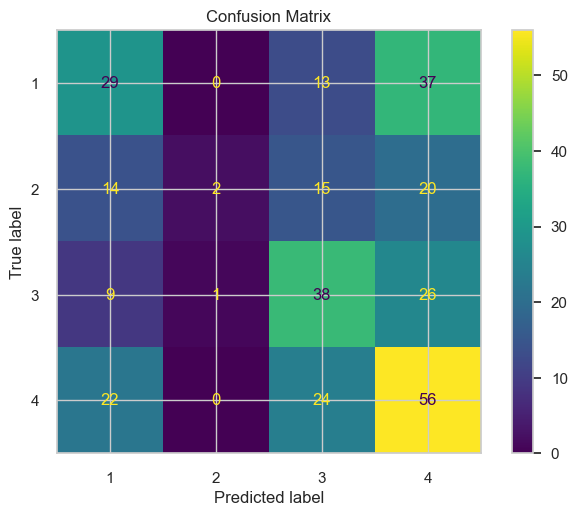

In [73]:
PredTable = model1.pred_table()
cluster_labels = np.arange(1, PredTable.shape[0] + 1)
ConfusionMatrixDisplay(confusion_matrix=PredTable, display_labels=cluster_labels).plot()

plt.title("Confusion Matrix")
plt.show()

**Cluster 4 has the best classification performance** (56 correct predictions). 
Cluster 2 instead has the worst performance (only 2 correctly classified cases).

We can conclude that there is significant confusion between certain clusters, indicating that the groups might have overlapping features.

### **3.2. Random Forest**

Given the poor performance of the Multinomial Logit model, we explored an alternative approach using a Random Forest model, a more flexible method that may improve predictive accuracy.

In [74]:
# apply One-Hot Encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=["age", "region", "location", "gender", "family_members", "job"], drop_first=True)

X = df_encoded.drop(columns=["Cluster_K4"])
y = df_encoded["Cluster_K4"]

# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)

# predictions
y_pred = rf.predict(X_test)

# model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3709677419354839

In [75]:
# classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score    support
1              0.250000  0.285714  0.266667  14.000000
2              0.750000  0.214286  0.333333  14.000000
3              0.461538  0.400000  0.428571  15.000000
4              0.344828  0.526316  0.416667  19.000000
accuracy       0.370968  0.370968  0.370968   0.370968
macro avg      0.451592  0.356579  0.361310  62.000000
weighted avg   0.443142  0.370968  0.366859  62.000000


The Random Forest model achieved an accuracy of 37%, indicating that the model has limited predictive performance.
- **Cluster 1:** low precision (0.25) and low recall (0.2857) indicate that the model struggles to correctly classify instances belonging to this cluster. The F1-score (0.2667) suggests that predictions for this class are not reliable.
- **Cluster 2:** high precision (0.75) but low recall (0.2143) means the model correctly identifies cluster 2 when it does so, but it often fails to classify many true cluster 2 instances. This suggests the model is overly selective, likely favoring other clusters.
- **Cluster 3:** moderate precision (0.4615) and moderate recall (0.4000) indicate a balanced, but not strong, classification performance. The F1-score (0.4286) shows that while predictions are better than for cluster 1, there is room for improvement.
- **Cluster 4:** higher recall (0.5263) means that many instances of this cluster are correctly identified. Lower precision (0.3448) suggests that the model also misclassifies some other cluster instances as cluster 4.

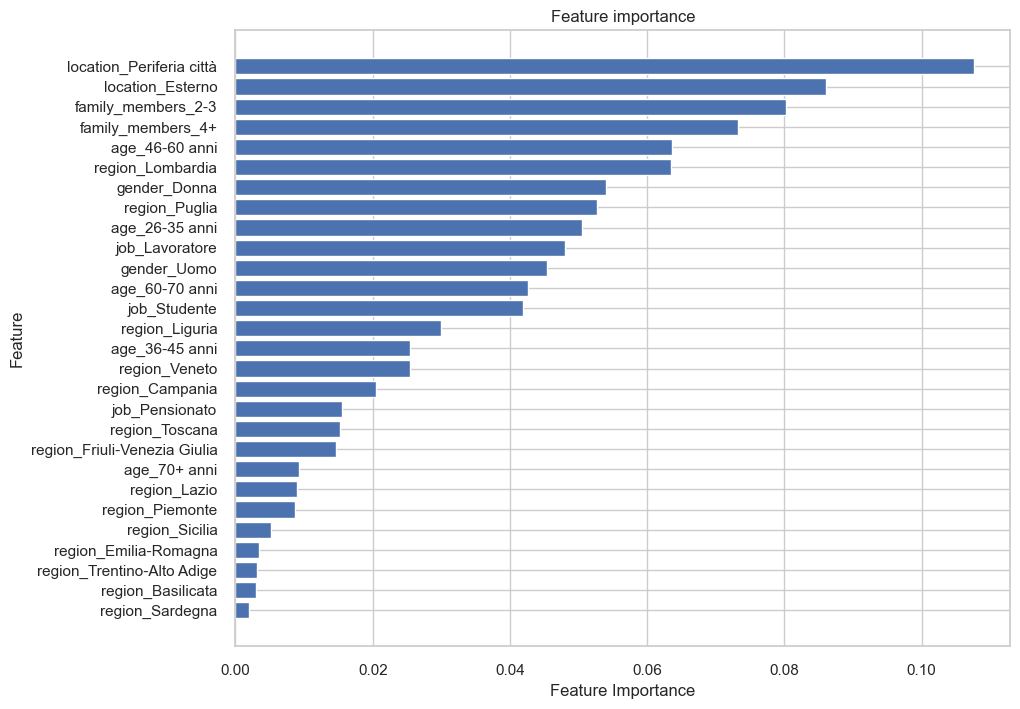

In [76]:
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature importance')
plt.gca().invert_yaxis()
plt.show()

After computing feature importance, we removed variables with low relevance (<0.1) and retrained the model to evaluate potential performance improvements.

In [77]:
# Set threshold for feature importance (remove features with importance < 0.01)
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']
X_reduced = X[important_features]

# split dataset into training and test set
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# retrain the Random Forest model with reduced features
rf_reduced = RandomForestClassifier(n_estimators=30, random_state=42)
rf_reduced.fit(X_train_red, y_train_red)

# predictions
y_pred_red = rf_reduced.predict(X_test_red)

# accuracy
accuracy_reduced = accuracy_score(y_test_red, y_pred_red)
print(accuracy_reduced)

# classification report
report_reduced = classification_report(y_test_red, y_pred_red, output_dict=True)
report_reduced_df = pd.DataFrame(report_reduced).transpose()
print(report_reduced_df)

0.3387096774193548
              precision    recall  f1-score   support
1              0.200000  0.214286  0.206897  14.00000
2              0.750000  0.214286  0.333333  14.00000
3              0.461538  0.400000  0.428571  15.00000
4              0.300000  0.473684  0.367347  19.00000
accuracy       0.338710  0.338710  0.338710   0.33871
macro avg      0.427885  0.325564  0.334037  62.00000
weighted avg   0.418114  0.338710  0.338248  62.00000


After removing the low-importance features, the model was retrained, and the new accuracy is **33.87%**. This is slightly lower than the previous accuracy (**37%**), which suggests that some of the removed features might have had a small but positive impact.

The low performance of both **Random Forest** and **Multinomial Logit** may be attributed to poorly defined clusters rather than model inefficiency.  If the original clustering (Cluster_K4) does not capture meaningful differences in the data, classification models will struggle to learn distinct patterns. In such cases, poor separation between clusters leads to significant overlap, making it difficult for any model to accurately predict class labels.

---


## **4. Conclusions and Limitations**

**Bias and Reliability Issues:**
1. **Freshness Attribute:** the question about freshness appears to focus more on a general interest rather than the specific context of purchase. This could lead to inflated ratings, and we suggest reformulating the question for future surveys to better capture actionable insights.

2. **Sustainability Attribute:** the responses on sustainability might be biased due to its status as a "sensitive" or "hot topic" for customers. Some respondents may have felt compelled to give high ratings, even if their behavior does not align with these preferences. This is evident from the highly skewed distribution of ratings, with a majority giving top scores (5). As a result, clusters may not be entirely reliable or reflective of true preferences.

3. **Correlated Attributes:** certain attributes, such as **speed** and **simplicity of preparation**, as well as different dimensions of sustainability (e.g., **packaging**, **sustainable fishing**, and **low-impact environment**), are highly correlated. Reformulating these attributes or combining them into broader categories could improve the clarity of future analyses.

4. **Price attribute:** the **'price'** attribute showed contradictions: while price sensitivity was highlighted as important, many respondents also indicated a willingness to spend more for higher quality. Reformulating this as **'willingness to pay more for quality'** could provide more actionable insights.

5. **Innovative products attribute**: the attribute **'innovative_products'** stood out due to its relatively well-distributed responses. This makes it a valuable metric for understanding how to create new products and cater to specific consumer segments.


**Limitations of the Clustering Analysis:**
1. **Inefficiency in Clustering:** the clustering process showed weak separation between certain groups, indicating that the clusters are not fully robust or reliable. This may stem from biases in the data, the choice of attributes, a sample that is not sufficiently representative or inherent overlaps in consumer preferences.
2. **Limited Reliability for Strategy:** given the inefficiency and potential biases, the clustering results cannot be fully relied upon for a completely data-driven strategy. While the analysis provides a general idea of segment characteristics, decisions should not be based solely on these clusters. Instead, we recommend focusing on the **most relevant cluster for specific goals** and combining these insights with qualitative research or additional data validation.
     
These findings underline the need to refine survey design, improve clustering methods, and carefully interpret results to ensure a robust and reliable segmentation strategy. While this analysis provides useful initial insights, future iterations should address these limitations for more actionable outcomes.